In [311]:
import pandas as pd
from pandasql import sqldf
pd.set_option('display.max_columns', None)

In [312]:
csvc = pd.read_pickle("customer_service_reps")
engagement = pd.read_pickle("engagement")
subs = pd.read_csv("subs.csv")
adspend = pd.read_excel("adspend.xlsx")

In [3]:
subs.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,cancel_before_trial_ends
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,NaN,2020-02-08 00:00:00,False,NaN,NaN,ar,True,False,Standard Charter,0
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,2020-03-16 00:00:00,False,0.0,0.3303,ar,False,False,NaN,1
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,2019-12-22 00:00:00,False,0.0,0.1101,ar,False,False,NaN,1
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,2020-02-11 00:00:00,False,0.0,0.0367,ar,False,False,NaN,1
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,2019-10-20 00:00:00,False,0.0,0.0367,ar,False,False,NaN,1


In [4]:
csvc.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN


In [5]:
engagement.head()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0


In [6]:
csvc.num_trial_days.value_counts()

14    1968089
7      160596
0       79958
Name: num_trial_days, dtype: int64

In [7]:
csvc7 = csvc[csvc['num_trial_days']==7]
csvc14 = csvc[csvc['num_trial_days']==14]
csvc0 = csvc[csvc['num_trial_days']==0]

In [8]:
subs.plan_type.value_counts()

base_uae_14_day_trial                227096
high_uae_14_day_trial                   325
low_uae_no_trial                        167
base_eur_14_day_trial                    18
high_sar_14_day_trial                    12
low_gbp_14_day_trial                      4
high_aud_14_day_trial                     2
low_eur_no_trial                          1
low_sar_no_trial                          1
base_uae_no_trial_7_day_guarantee         1
high_jpy_14_day_trial                     1
Name: plan_type, dtype: int64

In [9]:
subs['plan_type_days'] = 14

subs.loc[subs['plan_type']=='base_uae_no_trial_7_day_guarantee','plan_type_days']= 7
subs.loc[subs['plan_type']=='low_uae_no_trial','plan_type_days']= 0
subs.loc[subs['plan_type']=='low_sar_no_trial','plan_type_days']= 0
subs.loc[subs['plan_type']=='low_eur_no_trial','plan_type_days']= 0
subs.loc[subs['plan_type']=='low_eur_no_trial','plan_type_days']= 0


In [10]:
subs.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,cancel_before_trial_ends,plan_type_days
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,NaN,2020-02-08 00:00:00,False,NaN,NaN,ar,True,False,Standard Charter,0,14
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,2020-03-16 00:00:00,False,0.0,0.3303,ar,False,False,NaN,1,14
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,2019-12-22 00:00:00,False,0.0,0.1101,ar,False,False,NaN,1,14
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,2020-02-11 00:00:00,False,0.0,0.0367,ar,False,False,NaN,1,14
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,2019-10-20 00:00:00,False,0.0,0.0367,ar,False,False,NaN,1,14


In [11]:
subs14 = subs[subs['plan_type_days']==14]

# AB TESTING

In [13]:
q = '''select count(distinct(subid)) as no_of_subid_7day_trial
from csvc7'''

total_7day_trial = sqldf(q)
total_7day_trial

,no_of_subid_7day_trial
0,64043


In [14]:
q1 = '''select count(distinct(subid)) as no_7day_converted
from csvc7
where payment_period = 1'''

no_7day_converted = sqldf(q1)
no_7day_converted

,no_7day_converted
0,35314


In [15]:
# need to check if all customers in subscriber set was covered in customer service dataset

# Products in cpi holding that are not in cpi mapping
#set1 = set(cpiholding['Product_Code'].unique().tolist())
#set2 = set(cpimapping['Product_Code'].unique().tolist())
#diff = set1.difference(set2)
#missing_cpi_prod = list(diff)

# people in subscriber set that are not in csvc14
set1 = set(subs14['subid'].unique().tolist())
set2 = set(csvc14['subid'].unique().tolist())
diff = set1.difference(set2)
missing_subs_notcounted = list(diff)
len(missing_subs_notcounted)

92442

In [16]:
q2 = '''select count(distinct(subid)) as no_of_subid_14day_trial
from csvc14'''

total_14day_trial = sqldf(q2)
total_14day_trial

,no_of_subid_14day_trial
0,1281127


In [17]:
q3 = '''select count(distinct(subid)) as no_14day_converted
from csvc14
where payment_period = 1'''

no_14day_converted = sqldf(q3)
no_14day_converted

,no_14day_converted
0,523596


In [18]:
leftoutsubs = subs14[~subs14['subid'].isin(csvc14['subid'])]

In [19]:
leftoutsubs.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,cancel_before_trial_ends,plan_type_days
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,NaN,2020-02-08 00:00:00,False,NaN,NaN,ar,True,False,Standard Charter,0,14
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,2020-03-16 00:00:00,False,0.0,0.3303,ar,False,False,NaN,1,14
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,2020-02-11 00:00:00,False,0.0,0.0367,ar,False,False,NaN,1,14
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,2019-10-20 00:00:00,False,0.0,0.0367,ar,False,False,NaN,1,14
5,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,False,70.0,False,UAE,bing,tv,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-03 20:15:43,71.0,2020-03-18 00:00:00,False,0.0,0.3303,ar,True,True,RAKBANK,0,14


In [21]:
q4 = '''select count(distinct(subid)) as no_converted_14day_subs
from leftoutsubs
where (refund_after_trial_TF = 0) and (cancel_before_trial_ends = 0)'''

no_converted_14day_subs = sqldf(q4)
no_converted_14day_subs

,no_converted_14day_subs
0,36123


In [22]:
q5 = '''select count(distinct(subid)) as no_14day_subs_notin_csvc14
from leftoutsubs'''

no_14day_subs_notin_csvc14 = sqldf(q5)
no_14day_subs_notin_csvc14

,no_14day_subs_notin_csvc14
0,92442


# adspend

In [314]:
#cust_npb['FirstContactDay']=pd.to_datetime(cust_npb['FirstContactDay'],format='%Y%m%d')
subs['account_creation_date'] = pd.to_datetime(subs['account_creation_date'])

In [315]:
#df['Dates'] = pd.to_datetime(df['date']).dt.date
#df['Time'] = pd.to_datetime(df['date']).dt.time

subs['Date'] = subs['account_creation_date'].dt.date

In [316]:
subs.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,cancel_before_trial_ends,Date
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,NaN,2020-02-08 00:00:00,False,NaN,NaN,ar,True,False,Standard Charter,0,2020-01-24
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,2020-03-16 00:00:00,False,0.0,0.3303,ar,False,False,NaN,1,2020-03-01
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,2019-12-22 00:00:00,False,0.0,0.1101,ar,False,False,NaN,1,2019-12-07
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,2020-02-11 00:00:00,False,0.0,0.0367,ar,False,False,NaN,1,2020-01-27
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,2019-10-20 00:00:00,False,0.0,0.0367,ar,False,False,NaN,1,2019-10-05


In [317]:
subs_new = subs.drop(['account_creation_date'],axis=1)

In [318]:
subs_new.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,creation_until_cancel_days,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,cancel_before_trial_ends,Date
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,NaN,2020-02-08 00:00:00,False,NaN,NaN,ar,True,False,Standard Charter,0,2020-01-24
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,0.0,2020-03-16 00:00:00,False,0.0,0.3303,ar,False,False,NaN,1,2020-03-01
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,1.0,2019-12-22 00:00:00,False,0.0,0.1101,ar,False,False,NaN,1,2019-12-07
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,0.0,2020-02-11 00:00:00,False,0.0,0.0367,ar,False,False,NaN,1,2020-01-27
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,9.0,2019-10-20 00:00:00,False,0.0,0.0367,ar,False,False,NaN,1,2019-10-05


In [319]:
subs_new.dtypes

subid                             int64
package_type                     object
num_weekly_services_utilized    float64
preferred_genre                  object
intended_use                     object
weekly_consumption_hour         float64
num_ideal_streaming_services    float64
retarget_TF                        bool
age                             float64
male_TF                          object
country                          object
attribution_technical            object
attribution_survey               object
op_sys                           object
months_per_bill_period            int64
plan_type                        object
monthly_price                   float64
discount_price                  float64
creation_until_cancel_days      float64
trial_end_date                   object
initial_credit_card_declined       bool
revenue_net                     float64
join_fee                        float64
language                         object
paid_TF                            bool


In [320]:
subs_new['Date'] = pd.to_datetime(subs_new['Date'], format='%Y/%m/%d')

In [321]:
subs_new.dtypes

subid                                    int64
package_type                            object
num_weekly_services_utilized           float64
preferred_genre                         object
intended_use                            object
weekly_consumption_hour                float64
num_ideal_streaming_services           float64
retarget_TF                               bool
age                                    float64
male_TF                                 object
country                                 object
attribution_technical                   object
attribution_survey                      object
op_sys                                  object
months_per_bill_period                   int64
plan_type                               object
monthly_price                          float64
discount_price                         float64
creation_until_cancel_days             float64
trial_end_date                          object
initial_credit_card_declined              bool
revenue_net  

In [322]:
subs_new['Date'].dtype

dtype('<M8[ns]')

In [323]:
subs_new.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,creation_until_cancel_days,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,cancel_before_trial_ends,Date
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,NaN,2020-02-08 00:00:00,False,NaN,NaN,ar,True,False,Standard Charter,0,2020-01-24
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,0.0,2020-03-16 00:00:00,False,0.0,0.3303,ar,False,False,NaN,1,2020-03-01
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,1.0,2019-12-22 00:00:00,False,0.0,0.1101,ar,False,False,NaN,1,2019-12-07
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,0.0,2020-02-11 00:00:00,False,0.0,0.0367,ar,False,False,NaN,1,2020-01-27
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,9.0,2019-10-20 00:00:00,False,0.0,0.0367,ar,False,False,NaN,1,2019-10-05


In [324]:
adspend

,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100
1,2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600
2,2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800
3,2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400
4,2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300
5,2019-11-30,56100,75900,21400,21600,11700,9800,6300,7300
6,2019-12-31,51400,76100,32100,22200,12100,3500,7200,8000
7,2020-01-31,49000,75500,33600,22700,14300,300,6700,7400
8,2020-02-29,49700,76600,30100,21700,15000,300,6400,6500
9,2020-03-31,49100,78000,22700,21200,17600,300,5900,10000


In [325]:
subs_new['adspend_month'] = "9"

startdate01 = pd.to_datetime("2019-06-30").date()
enddate01 = pd.to_datetime("2019-07-31").date()

subs_new.loc[(subs_new['Date'] >= startdate01)&(subs_new['Date'] < enddate01), 'adspend_month'] = '0'

startdate12 = pd.to_datetime("2019-07-31").date()
enddate12 = pd.to_datetime("2019-08-31").date()

subs_new.loc[(subs_new['Date'] >= startdate12)&(subs_new['Date'] < enddate12), 'adspend_month'] = '1'

startdate23 = pd.to_datetime("2019-08-31").date()
enddate23 = pd.to_datetime("2019-09-30").date()

subs_new.loc[(subs_new['Date'] >= startdate23)&(subs_new['Date'] < enddate23), 'adspend_month'] = '2'

startdate34 = pd.to_datetime("2019-09-30").date()
enddate34 = pd.to_datetime("2019-10-31").date()

subs_new.loc[(subs_new['Date'] >= startdate34)&(subs_new['Date'] < enddate34), 'adspend_month'] = '3'

startdate45 = pd.to_datetime("2019-10-31").date()
enddate45 = pd.to_datetime("2019-11-30").date()

subs_new.loc[(subs_new['Date'] >= startdate45)&(subs_new['Date'] < enddate45), 'adspend_month'] = '4'

startdate56 = pd.to_datetime("2019-11-30").date()
enddate56 = pd.to_datetime("2019-12-31").date()

subs_new.loc[(subs_new['Date'] >= startdate56)&(subs_new['Date'] < enddate56), 'adspend_month'] = '5'

startdate67 = pd.to_datetime("2019-12-31").date()
enddate67 = pd.to_datetime("2020-01-31").date()

subs_new.loc[(subs_new['Date'] >= startdate67)&(subs_new['Date'] < enddate67), 'adspend_month'] = '6'

startdate78 = pd.to_datetime("2020-01-31").date()
enddate78 = pd.to_datetime("2020-02-29").date()

subs_new.loc[(subs_new['Date'] >= startdate78)&(subs_new['Date'] < enddate78), 'adspend_month'] = '7'

startdate89 = pd.to_datetime("2020-02-29").date()
enddate89 = pd.to_datetime("2020-03-31").date()

subs_new.loc[(subs_new['Date'] >= startdate89)&(subs_new['Date'] < enddate89), 'adspend_month'] = '8'


C:\Users\jenni\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
C:\Users\jenni\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jenni\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
no

In [326]:
adspend

,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100
1,2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600
2,2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800
3,2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400
4,2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300
5,2019-11-30,56100,75900,21400,21600,11700,9800,6300,7300
6,2019-12-31,51400,76100,32100,22200,12100,3500,7200,8000
7,2020-01-31,49000,75500,33600,22700,14300,300,6700,7400
8,2020-02-29,49700,76600,30100,21700,15000,300,6400,6500
9,2020-03-31,49100,78000,22700,21200,17600,300,5900,10000


In [327]:
a = [0,1,2,3,4,5,6,7,8,9]
adspend['adspend_month'] = a

In [328]:
adspend

,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral,adspend_month
0,2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100,0
1,2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600,1
2,2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800,2
3,2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400,3
4,2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300,4
5,2019-11-30,56100,75900,21400,21600,11700,9800,6300,7300,5
6,2019-12-31,51400,76100,32100,22200,12100,3500,7200,8000,6
7,2020-01-31,49000,75500,33600,22700,14300,300,6700,7400,7
8,2020-02-29,49700,76600,30100,21700,15000,300,6400,6500,8
9,2020-03-31,49100,78000,22700,21200,17600,300,5900,10000,9


In [26]:
adspend.sum(axis=1)

0    232900
1    228601
2    263002
3    268503
4    228204
5    210105
6    212606
7    209507
8    206308
9    204809
dtype: int64

In [329]:
def attribution_calc_1(channel):
    if channel not in ['facebook','email','search','brand sem intent google','affiliate','email_blast','pinterest','referral']:
        return 'compensate'
    else:
        return channel

In [330]:
def attribution_calc_2(row):
    if (row.attribution_calc == 'compensate') & (row.attribution_survey in  ['facebook','email','search','brand sem intent google','affiliate','email_blast','pinterest','referral']):
        label = row.attribution_survey
    else:
        label = row.attribution_technical
    return label

In [331]:
subs_new['attribution_calc'] = subs_new['attribution_technical'].apply(attribution_calc_1)

subs_new['attribution_calc'] = subs_new.apply(attribution_calc_2,axis=1)

In [332]:
subs_new.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,creation_until_cancel_days,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,cancel_before_trial_ends,Date,adspend_month,attribution_calc
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,NaN,2020-02-08 00:00:00,False,NaN,NaN,ar,True,False,Standard Charter,0,2020-01-24,6,facebook
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,0.0,2020-03-16 00:00:00,False,0.0,0.3303,ar,False,False,NaN,1,2020-03-01,8,facebook
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,1.0,2019-12-22 00:00:00,False,0.0,0.1101,ar,False,False,NaN,1,2019-12-07,5,facebook
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,0.0,2020-02-11 00:00:00,False,0.0,0.0367,ar,False,False,NaN,1,2020-01-27,6,search
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,9.0,2019-10-20 00:00:00,False,0.0,0.0367,ar,False,False,NaN,1,2019-10-05,3,discovery


In [31]:
len(subs_new['subid'].unique().tolist())

227628

In [32]:
subs_new.attribution_calc.value_counts()

facebook                   96409
search                     26738
email                      25690
brand sem intent google    18524
organic                    12712
affiliate                  10241
referral                   10149
email_blast                 7277
pinterest                   7121
google_organic              5019
discovery                   1358
brand sem intent bing       1242
podcast                      930
other                        823
youtube                      722
display                      550
bing                         493
internal                     424
facebook_organic             356
vod                          252
bing_organic                 189
ott                          146
direct_mail                  105
samsung                       55
quora                         34
influencer                    18
appstore                      18
criteo                        15
playstore                      5
twitter                        4
tv        

In [333]:
q6 = '''select adspend_month, sum(case when attribution_calc = 'facebook' then 1 else 0 end) as facebook,
sum(case when attribution_calc = 'email' then 1 else 0 end) as email,
sum(case when attribution_calc = 'search' then 1 else 0 end) as search,
sum(case when attribution_calc = 'brand sem intent google' then 1 else 0 end) as brand_sem_intent_google,
sum(case when attribution_calc = 'affiliate' then 1 else 0 end) as affiliate,
sum(case when attribution_calc = 'email_blast' then 1 else 0 end) as email_blast,
sum(case when attribution_calc = 'pinterest' then 1 else 0 end) as pinterest,
sum(case when attribution_calc = 'referral' then 1 else 0 end) as referral
from subs_new
group by adspend_month
order by adspend_month'''

attrition_conversion = sqldf(q6)
attrition_conversion

,adspend_month,facebook,email,search,brand_sem_intent_google,affiliate,email_blast,pinterest,referral
0,0,13240,3537,1523,2258,871,1618,954,980
1,1,11178,2991,1958,1860,1948,1875,741,886
2,2,8522,2493,2016,1552,1148,1605,615,1028
3,3,10957,2325,2484,1604,797,981,770,1042
4,4,14217,2459,2545,1953,537,629,667,1062
5,5,11498,2776,3927,2444,587,410,969,1167
6,6,8001,2356,4257,2659,1096,37,977,1200
7,7,9597,3101,4544,2345,1537,63,785,1328
8,8,9199,3652,3484,1849,1720,59,643,1456


In [334]:
adspend

,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral,adspend_month
0,2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100,0
1,2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600,1
2,2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800,2
3,2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400,3
4,2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300,4
5,2019-11-30,56100,75900,21400,21600,11700,9800,6300,7300,5
6,2019-12-31,51400,76100,32100,22200,12100,3500,7200,8000,6
7,2020-01-31,49000,75500,33600,22700,14300,300,6700,7400,7
8,2020-02-29,49700,76600,30100,21700,15000,300,6400,6500,8
9,2020-03-31,49100,78000,22700,21200,17600,300,5900,10000,9


In [335]:
adspend = adspend.rename(columns={"brand sem intent google": "brand_sem_intent_google"})

In [336]:
# calaculate CAC for each of the paid channels and store it in a dataframe
cac = pd.DataFrame()

cac['Month'] = adspend['date']

for col in ['facebook', 'email', 'search', 'brand_sem_intent_google',
       'affiliate', 'email_blast', 'pinterest', 'referral']:
    cac[col] = adspend[col]/attrition_conversion[col]

In [337]:
cac = cac.drop(9)

In [338]:
average_cac = cac.mean()

In [339]:
average_cac

facebook                    5.311310
email                      27.275393
search                      8.228543
brand_sem_intent_google    10.832586
affiliate                  14.034886
email_blast                35.362719
pinterest                   8.284396
referral                    6.358070
dtype: float64

In [340]:
#pd.DataFrame({'email':sf.index, 'list':sf.values})
average_cac = pd.DataFrame({'channel':average_cac.index, 'average_cac':average_cac.values})

In [341]:
average_cac

,channel,average_cac
0,facebook,5.311310
1,email,27.275393
2,search,8.228543
3,brand_sem_intent_google,10.832586
4,affiliate,14.034886
5,email_blast,35.362719
6,pinterest,8.284396
7,referral,6.358070


In [42]:
average_cac.mean()

average_cac    14.460988
dtype: float64

# prediction model

In [43]:
# build prediction model to calculate CLV of individual customer
# we need individual CAC values to calculate the CLV
# so we can only use customers whom we have average CAC value

In [44]:
q7 = '''select *
from subs_new
inner join average_cac
on average_cac.channel = subs_new.attribution_calc'''

subs_new_withcac = sqldf(q7)
subs_new_withcac

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,creation_until_cancel_days,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,cancel_before_trial_ends,plan_type_days,Date,adspend_month,attribution_calc,channel,average_cac
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,0,NaN,0.0,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,NaN,2020-02-08 00:00:00,0,NaN,NaN,ar,1,0,Standard Charter,0,14,2020-01-24 00:00:00.000000,6,facebook,facebook,5.311310
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,0,70.0,0.0,UAE,facebook,facebook,None,4,base_uae_14_day_trial,4.7343,4.5141,0.0,2020-03-16 00:00:00,0,0.0000,0.3303,ar,0,0,None,1,14,2020-03-01 00:00:00.000000,8,facebook,facebook,5.311310
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,0,25.0,1.0,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,1.0,2019-12-22 00:00:00,0,0.0000,0.1101,ar,0,0,None,1,14,2019-12-07 00:00:00.000000,5,facebook,facebook,5.311310
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,0,30.0,0.0,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,0.0,2020-02-11 00:00:00,0,0.0000,0.0367,ar,0,0,None,1,14,2020-01-27 00:00:00.000000,6,search,search,8.228543
4,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,0,61.0,0.0,UAE,bing,search,Android,4,base_uae_14_day_trial,4.7343,4.5141,NaN,2020-03-05 00:00:00,0,4.5875,0.3303,ar,1,0,Standard Charter,0,14,2020-02-19 00:00:00.000000,7,search,search,8.228543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183620,25835684,base,2.169904,drama,access to exclusive content,24.401536,1.881068,0,43.0,0.0,UAE,email,pinterest,iOS,4,base_uae_14_day_trial,4.7343,4.5141,11.0,2020-01-16 00:00:00,0,0.0000,0.0000,ar,0,0,None,1,14,2020-01-01 00:00:00.000000,6,email,email,27.275393
183621,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,0,38.0,0.0,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,8.0,2019-12-02 00:00:00,0,0.0000,0.3303,ar,0,0,None,1,14,2019-11-17 00:00:00.000000,4,facebook,facebook,5.311310
183622,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,1,49.0,0.0,UAE,google_organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,NaN,2019-12-21 00:00:00,0,4.5875,0.3303,ar,1,0,Paypal,0,14,2019-12-06 00:00:00.000000,5,referral,referral,6.358070
183623,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,0,45.0,0.0,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,31.0,2020-01-05 00:00:00,1,0.0000,0.0367,ar,0,0,None,0,14,2019-12-21 00:00:00.000000,5,facebook,facebook,5.311310


In [45]:
# from above table we see there are 183625 unique customers whom we have CAC value
len(subs_new_withcac.subid.unique().tolist())

183625

In [46]:
# now i want to build a prediction model where churn = customer moves to payment 1 from trial (payment 0)
# so i need to select the customers who have moved on to payment 1
q8 = '''select *
from subs_new_withcac
inner join csvc
on subs_new_withcac.subid = csvc.subid
where payment_period = 0 or payment_period = 1
'''

test = sqldf(q8)
test

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,creation_until_cancel_days,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,cancel_before_trial_ends,plan_type_days,Date,adspend_month,attribution_calc,channel,average_cac,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
0,21697364,base,NaN,drama,access to exclusive content,30.201361,NaN,0,56.0,0.0,UAE,affiliate,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,12.0,2020-04-11 00:00:00,0,0.0000,0.3303,ar,0,0,None,1,14,2020-03-27 00:00:00.000000,8,affiliate,affiliate,14.034886,30034436,21697364,0,2020-04-08 13:16:39.000000,2020-03-27 23:59:06.000000,14,0,OTT,0.0000,0,2020-03-28 00:05:20.000000,None,0.0
1,20407871,base,2.670664,comedy,supplement OTT,28.751405,1.939364,0,33.0,0.0,UAE,referral,referral,Android,4,base_uae_14_day_trial,4.7343,4.5141,5.0,2020-04-11 00:00:00,0,0.0000,0.0000,ar,0,0,None,1,14,2020-03-27 00:00:00.000000,8,referral,referral,6.358070,34138852,20407871,0,2020-04-01 05:42:28.000000,2020-03-27 23:58:49.000000,14,0,OTT,0.0000,0,2020-03-27 23:58:49.000000,None,0.0
2,27818002,enhanced,4.423316,drama,access to exclusive content,30.201361,2.322935,0,34.0,0.0,UAE,organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,12.0,2020-04-11 00:00:00,0,0.0000,0.3303,ar,0,0,None,1,14,2020-03-27 00:00:00.000000,8,referral,referral,6.358070,33808892,27818002,0,2020-04-08 22:00:59.000000,2020-03-27 23:53:40.000000,14,0,OTT,0.0000,0,2020-03-28 00:05:20.000000,None,0.0
3,25529197,base,2.588186,comedy,other,28.751405,1.902879,1,38.0,0.0,UAE,search,tv,iOS,4,base_uae_14_day_trial,4.7343,4.5141,13.0,2020-04-11 00:00:00,0,0.0000,0.0367,ar,0,0,None,1,14,2020-03-27 00:00:00.000000,8,search,search,8.228543,36138972,25529197,0,2020-04-09 13:51:56.000000,2020-03-27 23:51:20.000000,14,0,OTT,0.0000,0,2020-03-28 00:05:19.000000,None,0.0
4,23220317,base,NaN,international,access to exclusive content,36.001186,NaN,0,48.0,0.0,UAE,google_organic,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,14.0,2020-04-11 00:00:00,0,0.0000,0.1101,ar,0,0,None,1,14,2020-03-27 00:00:00.000000,8,facebook,facebook,5.311310,30314987,23220317,0,2020-04-10 16:28:43.000000,2020-03-27 23:48:52.000000,14,0,OTT,0.0000,0,2020-03-28 07:10:03.000000,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154965,29969407,None,4.820977,None,expand international access,28.751405,2.694708,0,44.0,0.0,UAE,search,tv,iOS,4,base_uae_14_day_trial,4.7343,4.5141,7.0,2019-07-15 00:00:00,0,0.0000,0.0367,ar,0,0,None,1,14,2019-06-30 00:00:00.000000,0,search,search,8.228543,34410719,29969407,0,2019-07-07 14:15:50.000000,2019-06-30 00:01:31.000000,14,0,OTT,0.0000,0,2019-06-30 01:05:36.000000,None,0.0
154966,27585257,None,2.591132,None,other,27.301448,1.936826,0,53.0,0.0,UAE,google_organic,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,NaN,2019-07-15 00:00:00,0,4.9178,0.0000,ar,1,0,Najim,0,14,2019-06-30 00:00:00.000000,0,facebook,facebook,5.311310,38865556,27585257,0,None,2019-06-30 00:01:25.000000,14,1,OTT,4.9178,0,2019-06-30 00:01:25.000000,2019-07-14 14:33:09.000000,1.0
154967,27585257,None,2.591132,None,other,27.301448,1.936826,0,53.0,0.0,UAE,google_organic,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,NaN,2019-07-15 00:00:00,0,4.9178,0.0000,ar,1,0,Najim,0,14,2019-06-30 00:00:00.000000,0,facebook,facebook,5.311310,38865556,27585257,0,None,2019-06-30 00:01:25.000000,14,1,OTT,4.9178,1,2019-07-14 14:33:09.000000,None,0.0
154968,26986758,None,4.1

In [49]:
# having the above dataset, i want to select some data columns that I think will be useful
# (ie drop those i think are useless)
# then join the smaller set with the engagement dataset
# so that I can see who are more likely to churn
q9 = '''select subs.subid, subs.package_type, subs.num_weekly_services_utilized, subs.preferred_genre,
subs.intended_use, subs.weekly_consumption_hour, subs.num_ideal_streaming_services, subs.age, subs.male_TF, subs.country,
subs.op_sys, subs.plan_type, subs.creation_until_cancel_days, subs.refund_after_trial_TF, subs.payment_type, 
subs.cancel_before_trial_ends, subs.adspend_month, subs.attribution_calc, c.trial_completed_TF, c.billing_channel, 
c.payment_period
from subs_new_withcac as subs
inner join csvc as c
on subs.subid = c.subid
where payment_period = 0 or payment_period = 1
'''

temp = sqldf(q9)
temp

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,op_sys,plan_type,creation_until_cancel_days,refund_after_trial_TF,payment_type,cancel_before_trial_ends,adspend_month,attribution_calc,trial_completed_TF,billing_channel,payment_period
0,21697364,base,NaN,drama,access to exclusive content,30.201361,NaN,56.0,0.0,UAE,iOS,base_uae_14_day_trial,12.0,0,None,1,8,affiliate,0,OTT,0
1,20407871,base,2.670664,comedy,supplement OTT,28.751405,1.939364,33.0,0.0,UAE,Android,base_uae_14_day_trial,5.0,0,None,1,8,referral,0,OTT,0
2,27818002,enhanced,4.423316,drama,access to exclusive content,30.201361,2.322935,34.0,0.0,UAE,iOS,base_uae_14_day_trial,12.0,0,None,1,8,referral,0,OTT,0
3,25529197,base,2.588186,comedy,other,28.751405,1.902879,38.0,0.0,UAE,iOS,base_uae_14_day_trial,13.0,0,None,1,8,search,0,OTT,0
4,23220317,base,NaN,international,access to exclusive content,36.001186,NaN,48.0,0.0,UAE,Android,base_uae_14_day_trial,14.0,0,None,1,8,facebook,0,OTT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154965,29969407,None,4.820977,None,expand international access,28.751405,2.694708,44.0,0.0,UAE,iOS,base_uae_14_day_trial,7.0,0,None,1,0,search,0,OTT,0
154966,27585257,None,2.591132,None,other,27.301448,1.936826,53.0,0.0,UAE,Android,base_uae_14_day_trial,NaN,0,Najim,0,0,facebook,1,OTT,0
154967,27585257,None,2.591132,None,other,27.301448,1.936826,53.0,0.0,UAE,Android,base_uae_14_day_trial,NaN,0,Najim,0,0,facebook,1,OTT,1
154968,26986758,None,4.193557,None,expand international access,30.201361,2.384519,49.0,0.0,UAE,iOS,base_uae_14_day_trial,12.0,0,None,1,0,facebook,0,OTT,0


In [50]:
#because the temp dataset has many columns, and repeat values due to payment periods 0 and 1, i want to 'aggregate'
#this value so that each customer is represented by 1 row

q10 = '''select subid, package_type, num_weekly_services_utilized, preferred_genre, intended_use, weekly_consumption_hour,
num_ideal_streaming_services, age, male_TF, country, op_sys, plan_type, creation_until_cancel_days, refund_after_trial_TF, 
payment_type, cancel_before_trial_ends, adspend_month, attribution_calc, trial_completed_TF, billing_channel, sum(payment_period)
from temp
group by subid, package_type, num_weekly_services_utilized, preferred_genre, intended_use, weekly_consumption_hour,
num_ideal_streaming_services, age, male_TF, country, op_sys, plan_type, creation_until_cancel_days, refund_after_trial_TF, 
payment_type, cancel_before_trial_ends, adspend_month, attribution_calc, trial_completed_TF, billing_channel
'''

selected_subjoincsvc = sqldf(q10)
selected_subjoincsvc

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,op_sys,plan_type,creation_until_cancel_days,refund_after_trial_TF,payment_type,cancel_before_trial_ends,adspend_month,attribution_calc,trial_completed_TF,billing_channel,sum(payment_period)
0,20000062,None,4.025656,None,expand regional access,27.301448,2.342891,59.0,0.0,UAE,Android,base_uae_14_day_trial,4.0,0,None,1,0,facebook,0,OTT,0
1,20000405,enhanced,3.952012,comedy,access to exclusive content,33.101274,2.375602,48.0,0.0,UAE,iOS,base_uae_14_day_trial,10.0,0,None,1,8,facebook,0,OTT,0
2,20000604,economy,NaN,comedy,replace OTT,NaN,NaN,NaN,0.0,UAE,Android,base_uae_14_day_trial,NaN,0,Paypal,0,7,facebook,1,OTT,1
3,20000685,base,2.817946,comedy,other,25.851492,1.873939,67.0,0.0,UAE,iOS,base_uae_14_day_trial,NaN,0,Standard Charter,0,8,referral,1,OTT,1
4,20000741,base,NaN,comedy,access to exclusive content,25.851492,NaN,75.0,0.0,UAE,Android,base_uae_14_day_trial,1.0,0,None,1,1,facebook,0,OTT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109171,29999335,base,2.340753,regional,supplement OTT,27.301448,1.826068,23.0,0.0,UAE,Android,base_uae_14_day_trial,11.0,0,None,1,7,facebook,0,OTT,0
109172,29999524,None,NaN,None,expand regional access,27.301448,NaN,69.0,0.0,UAE,iOS,base_uae_14_day_trial,4.0,0,None,1,0,facebook,0,OTT,0
109173,29999590,base,2.794378,comedy,replace OTT,28.751405,1.961446,38.0,0.0,UAE,iOS,base_uae_14_day_trial,NaN,0,Standard Charter,0,6,email,1,OTT,1
109174,29999820,base,2.327497,comedy,replace OTT,21.501623,1.885493,66.0,0.0,UAE,iOS,base_uae_14_day_trial,9.0,0,None,1,2,facebook,0,OTT,0


In [51]:
selected_subjoincsvc.isna().any()

subid                           False
package_type                     True
num_weekly_services_utilized     True
preferred_genre                  True
intended_use                     True
weekly_consumption_hour          True
num_ideal_streaming_services     True
age                              True
male_TF                         False
country                         False
op_sys                           True
plan_type                       False
creation_until_cancel_days       True
refund_after_trial_TF           False
payment_type                     True
cancel_before_trial_ends        False
adspend_month                   False
attribution_calc                False
trial_completed_TF              False
billing_channel                 False
sum(payment_period)             False
dtype: bool

In [52]:
engagement.head(50).sort_values('subid')

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
73,20848497,2019-07-10,0.0,0.0,0.0,4.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
258,20848497,2019-07-15,0.0,1.0,0.0,0.0,0.0,0.0,0.0
255,20848497,2019-07-14,1.0,0.0,0.0,4.0,0.0,0.0,0.0
55,20848497,2019-07-03,1.0,1.0,6.0,6.0,0.0,1.0,0.0
58,20848497,2019-07-04,1.0,1.0,5.0,5.0,0.0,1.0,0.0
59,20848497,2019-07-05,1.0,0.0,5.0,5.0,0.0,1.0,0.0
70,20848497,2019-07-08,1.0,1.0,0.0,5.0,0.0,0.0,0.0
64,20848497,2019-07-06,1.0,0.0,4.0,5.0,0.0,1.0,0.0
67,20848497,2019-07-07,1.0,0.0,4.0,4.0,0.0,1.0,0.0


In [53]:
engagement.payment_period.value_counts()

0.0    1172085
1.0    1117196
2.0     261747
3.0      34696
Name: payment_period, dtype: int64

In [54]:
# here, I want to get the engagement information of a customer's trial period to determine their activity level if they will churn
# i aggregated their activity using sum and average
# i also focus on payment period 0 to find out their trial period activity

q11 = '''select subid, count(date) as number, sum(app_opens) as sum_app_opens, sum(cust_service_mssgs) as sum_cust_service_mssgs,
sum(num_videos_completed) as sum_num_videos_completed, sum(num_videos_more_than_30_seconds) as sum_vid_more_30, sum(num_videos_rated) as sum_videos_rated,
sum(num_series_started) as sum_series_started, avg(app_opens) as avg_app_opens, avg(cust_service_mssgs) as avg_cust_service_mssgs,
avg(num_videos_completed) as avg_num_videos_completed, avg(num_videos_more_than_30_seconds) as avg_vid_more_30, avg(num_videos_rated) as avg_videos_rated,
avg(num_series_started) as avg_series_started
from engagement
where payment_period = 0
group by subid'''

engagement0_agg = sqldf(q11)
engagement0_agg

,subid,number,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started
0,20000062,4,4.0,3.0,6.0,23.0,0.0,1.0,1.000000,0.750000,1.500000,5.750000,0.0,0.250000
1,20000405,4,5.0,4.0,13.0,17.0,0.0,1.0,1.250000,1.000000,3.250000,4.250000,0.0,0.250000
2,20000604,13,13.0,4.0,8.0,64.0,0.0,1.0,1.000000,0.307692,0.615385,4.923077,0.0,0.076923
3,20000685,13,17.0,4.0,11.0,63.0,0.0,7.0,1.307692,0.307692,0.846154,4.846154,0.0,0.538462
4,20000741,2,1.0,1.0,2.0,7.0,0.0,0.0,0.500000,0.500000,1.000000,3.500000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134987,29999740,14,15.0,3.0,11.0,31.0,0.0,0.0,1.071429,0.214286,0.785714,2.214286,0.0,0.000000
134988,29999820,10,12.0,6.0,22.0,50.0,0.0,7.0,1.200000,0.600000,2.200000,5.000000,0.0,0.700000
134989,29999822,5,5.0,4.0,2.0,25.0,0.0,1.0,1.000000,0.800000,0.400000,5.000000,0.0,0.200000
134990,29999889,15,44.0,14.0,74.0,74.0,0.0,15.0,2.933333,0.933333,4.933333,4.933333,0.0,1.000000


In [55]:
# join the two datasets together to find the intersect of customers
# intersect of subscriber, customer service payment period 0 and 1, and engagement data
q12 = '''select * from selected_subjoincsvc inner join engagement0_agg on selected_subjoincsvc.subid = engagement0_agg.subid'''

df = sqldf(q12)
df

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,op_sys,plan_type,creation_until_cancel_days,refund_after_trial_TF,payment_type,cancel_before_trial_ends,adspend_month,attribution_calc,trial_completed_TF,billing_channel,sum(payment_period),subid,number,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started
0,20000062,None,4.025656,None,expand regional access,27.301448,2.342891,59.0,0.0,UAE,Android,base_uae_14_day_trial,4.0,0,None,1,0,facebook,0,OTT,0,20000062,4,4.0,3.0,6.0,23.0,0.0,1.0,1.000000,0.750000,1.500000,5.750000,0.0,0.250000
1,20000405,enhanced,3.952012,comedy,access to exclusive content,33.101274,2.375602,48.0,0.0,UAE,iOS,base_uae_14_day_trial,10.0,0,None,1,8,facebook,0,OTT,0,20000405,4,5.0,4.0,13.0,17.0,0.0,1.0,1.250000,1.000000,3.250000,4.250000,0.0,0.250000
2,20000604,economy,NaN,comedy,replace OTT,NaN,NaN,NaN,0.0,UAE,Android,base_uae_14_day_trial,NaN,0,Paypal,0,7,facebook,1,OTT,1,20000604,13,13.0,4.0,8.0,64.0,0.0,1.0,1.000000,0.307692,0.615385,4.923077,0.0,0.076923
3,20000685,base,2.817946,comedy,other,25.851492,1.873939,67.0,0.0,UAE,iOS,base_uae_14_day_trial,NaN,0,Standard Charter,0,8,referral,1,OTT,1,20000685,13,17.0,4.0,11.0,63.0,0.0,7.0,1.307692,0.307692,0.846154,4.846154,0.0,0.538462
4,20000741,base,NaN,comedy,access to exclusive content,25.851492,NaN,75.0,0.0,UAE,Android,base_uae_14_day_trial,1.0,0,None,1,1,facebook,0,OTT,0,20000741,2,1.0,1.0,2.0,7.0,0.0,0.0,0.500000,0.500000,1.000000,3.500000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109156,29999335,base,2.340753,regional,supplement OTT,27.301448,1.826068,23.0,0.0,UAE,Android,base_uae_14_day_trial,11.0,0,None,1,7,facebook,0,OTT,0,29999335,12,12.0,5.0,54.0,62.0,0.0,8.0,1.000000,0.416667,4.500000,5.166667,0.0,0.666667
109157,29999524,None,NaN,None,expand regional access,27.301448,NaN,69.0,0.0,UAE,iOS,base_uae_14_day_trial,4.0,0,None,1,0,facebook,0,OTT,0,29999524,4,4.0,2.0,2.0,12.0,0.0,0.0,1.000000,0.500000,0.500000,3.000000,0.0,0.000000
109158,29999590,base,2.794378,comedy,replace OTT,28.751405,1.961446,38.0,0.0,UAE,iOS,base_uae_14_day_trial,NaN,0,Standard Charter,0,6,email,1,OTT,1,29999590,14,40.0,4.0,52.0,67.0,0.0,13.0,2.857143,0.285714,3.714286,4.785714,0.0,0.928571
109159,29999820,base,2.327497,comedy,replace OTT,21.501623,1.885493,66.0,0.0,UAE,iOS,base_uae_14_day_trial,9.0,0,None,1,2,facebook,0,OTT,0,29999820,10,12.0,6.0,22.0,50.0,0.0,7.0,1.200000,0.600000,2.200000,5.000000,0.0,0.700000


In [56]:
df.refund_after_trial_TF.value_counts()

0    105637
1      3524
Name: refund_after_trial_TF, dtype: int64

In [57]:
temprefund = df[df['refund_after_trial_TF']==1]

In [58]:
# using the columns I have, create the dependent variable y as churn
# defined by 1) customer not completing trial,
# or customer completed trial but asked for refund

# 0 = no churn
# 1 = churn

df['churn'] = 0
df.loc[df['trial_completed_TF'] == 0,'churn'] = 1
df.loc[(df['refund_after_trial_TF'] == 1)&(df['trial_completed_TF'] == 1), 'churn'] = 1

In [59]:
df

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,op_sys,plan_type,creation_until_cancel_days,refund_after_trial_TF,payment_type,cancel_before_trial_ends,adspend_month,attribution_calc,trial_completed_TF,billing_channel,sum(payment_period),subid,number,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started,churn
0,20000062,None,4.025656,None,expand regional access,27.301448,2.342891,59.0,0.0,UAE,Android,base_uae_14_day_trial,4.0,0,None,1,0,facebook,0,OTT,0,20000062,4,4.0,3.0,6.0,23.0,0.0,1.0,1.000000,0.750000,1.500000,5.750000,0.0,0.250000,1
1,20000405,enhanced,3.952012,comedy,access to exclusive content,33.101274,2.375602,48.0,0.0,UAE,iOS,base_uae_14_day_trial,10.0,0,None,1,8,facebook,0,OTT,0,20000405,4,5.0,4.0,13.0,17.0,0.0,1.0,1.250000,1.000000,3.250000,4.250000,0.0,0.250000,1
2,20000604,economy,NaN,comedy,replace OTT,NaN,NaN,NaN,0.0,UAE,Android,base_uae_14_day_trial,NaN,0,Paypal,0,7,facebook,1,OTT,1,20000604,13,13.0,4.0,8.0,64.0,0.0,1.0,1.000000,0.307692,0.615385,4.923077,0.0,0.076923,0
3,20000685,base,2.817946,comedy,other,25.851492,1.873939,67.0,0.0,UAE,iOS,base_uae_14_day_trial,NaN,0,Standard Charter,0,8,referral,1,OTT,1,20000685,13,17.0,4.0,11.0,63.0,0.0,7.0,1.307692,0.307692,0.846154,4.846154,0.0,0.538462,0
4,20000741,base,NaN,comedy,access to exclusive content,25.851492,NaN,75.0,0.0,UAE,Android,base_uae_14_day_trial,1.0,0,None,1,1,facebook,0,OTT,0,20000741,2,1.0,1.0,2.0,7.0,0.0,0.0,0.500000,0.500000,1.000000,3.500000,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109156,29999335,base,2.340753,regional,supplement OTT,27.301448,1.826068,23.0,0.0,UAE,Android,base_uae_14_day_trial,11.0,0,None,1,7,facebook,0,OTT,0,29999335,12,12.0,5.0,54.0,62.0,0.0,8.0,1.000000,0.416667,4.500000,5.166667,0.0,0.666667,1
109157,29999524,None,NaN,None,expand regional access,27.301448,NaN,69.0,0.0,UAE,iOS,base_uae_14_day_trial,4.0,0,None,1,0,facebook,0,OTT,0,29999524,4,4.0,2.0,2.0,12.0,0.0,0.0,1.000000,0.500000,0.500000,3.000000,0.0,0.000000,1
109158,29999590,base,2.794378,comedy,replace OTT,28.751405,1.961446,38.0,0.0,UAE,iOS,base_uae_14_day_trial,NaN,0,Standard Charter,0,6,email,1,OTT,1,29999590,14,40.0,4.0,52.0,67.0,0.0,13.0,2.857143,0.285714,3.714286,4.785714,0.0,0.928571,0
109159,29999820,base,2.327497,comedy,replace OTT,21.501623,1.885493,66.0,0.0,UAE,iOS,base_uae_14_day_trial,9.0,0,None,1,2,facebook,0,OTT,0,29999820,10,12.0,6.0,22.0,50.0,0.0,7.0,1.200000,0.600000,2.200000,5.000000,0.0,0.700000,1


In [60]:
# after I created churn feature, i want to drop the variables that are directly correlated to churn, and other variables which i think
# is not important

df = df.drop(['refund_after_trial_TF','cancel_before_trial_ends','trial_completed_TF','creation_until_cancel_days','adspend_month','billing_channel','sum(payment_period)'],axis=1)

In [61]:
df

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,op_sys,plan_type,payment_type,attribution_calc,subid,number,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started,churn
0,20000062,None,4.025656,None,expand regional access,27.301448,2.342891,59.0,0.0,UAE,Android,base_uae_14_day_trial,None,facebook,20000062,4,4.0,3.0,6.0,23.0,0.0,1.0,1.000000,0.750000,1.500000,5.750000,0.0,0.250000,1
1,20000405,enhanced,3.952012,comedy,access to exclusive content,33.101274,2.375602,48.0,0.0,UAE,iOS,base_uae_14_day_trial,None,facebook,20000405,4,5.0,4.0,13.0,17.0,0.0,1.0,1.250000,1.000000,3.250000,4.250000,0.0,0.250000,1
2,20000604,economy,NaN,comedy,replace OTT,NaN,NaN,NaN,0.0,UAE,Android,base_uae_14_day_trial,Paypal,facebook,20000604,13,13.0,4.0,8.0,64.0,0.0,1.0,1.000000,0.307692,0.615385,4.923077,0.0,0.076923,0
3,20000685,base,2.817946,comedy,other,25.851492,1.873939,67.0,0.0,UAE,iOS,base_uae_14_day_trial,Standard Charter,referral,20000685,13,17.0,4.0,11.0,63.0,0.0,7.0,1.307692,0.307692,0.846154,4.846154,0.0,0.538462,0
4,20000741,base,NaN,comedy,access to exclusive content,25.851492,NaN,75.0,0.0,UAE,Android,base_uae_14_day_trial,None,facebook,20000741,2,1.0,1.0,2.0,7.0,0.0,0.0,0.500000,0.500000,1.000000,3.500000,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109156,29999335,base,2.340753,regional,supplement OTT,27.301448,1.826068,23.0,0.0,UAE,Android,base_uae_14_day_trial,None,facebook,29999335,12,12.0,5.0,54.0,62.0,0.0,8.0,1.000000,0.416667,4.500000,5.166667,0.0,0.666667,1
109157,29999524,None,NaN,None,expand regional access,27.301448,NaN,69.0,0.0,UAE,iOS,base_uae_14_day_trial,None,facebook,29999524,4,4.0,2.0,2.0,12.0,0.0,0.0,1.000000,0.500000,0.500000,3.000000,0.0,0.000000,1
109158,29999590,base,2.794378,comedy,replace OTT,28.751405,1.961446,38.0,0.0,UAE,iOS,base_uae_14_day_trial,Standard Charter,email,29999590,14,40.0,4.0,52.0,67.0,0.0,13.0,2.857143,0.285714,3.714286,4.785714,0.0,0.928571,0
109159,29999820,base,2.327497,comedy,replace OTT,21.501623,1.885493,66.0,0.0,UAE,iOS,base_uae_14_day_trial,None,facebook,29999820,10,12.0,6.0,22.0,50.0,0.0,7.0,1.200000,0.600000,2.200000,5.000000,0.0,0.700000,1


In [62]:
# here, I remove the duplicate df.subid column due to sql joins
df = df.loc[:,~df.columns.duplicated()]

In [63]:
df

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,op_sys,plan_type,payment_type,attribution_calc,number,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started,churn
0,20000062,None,4.025656,None,expand regional access,27.301448,2.342891,59.0,0.0,UAE,Android,base_uae_14_day_trial,None,facebook,4,4.0,3.0,6.0,23.0,0.0,1.0,1.000000,0.750000,1.500000,5.750000,0.0,0.250000,1
1,20000405,enhanced,3.952012,comedy,access to exclusive content,33.101274,2.375602,48.0,0.0,UAE,iOS,base_uae_14_day_trial,None,facebook,4,5.0,4.0,13.0,17.0,0.0,1.0,1.250000,1.000000,3.250000,4.250000,0.0,0.250000,1
2,20000604,economy,NaN,comedy,replace OTT,NaN,NaN,NaN,0.0,UAE,Android,base_uae_14_day_trial,Paypal,facebook,13,13.0,4.0,8.0,64.0,0.0,1.0,1.000000,0.307692,0.615385,4.923077,0.0,0.076923,0
3,20000685,base,2.817946,comedy,other,25.851492,1.873939,67.0,0.0,UAE,iOS,base_uae_14_day_trial,Standard Charter,referral,13,17.0,4.0,11.0,63.0,0.0,7.0,1.307692,0.307692,0.846154,4.846154,0.0,0.538462,0
4,20000741,base,NaN,comedy,access to exclusive content,25.851492,NaN,75.0,0.0,UAE,Android,base_uae_14_day_trial,None,facebook,2,1.0,1.0,2.0,7.0,0.0,0.0,0.500000,0.500000,1.000000,3.500000,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109156,29999335,base,2.340753,regional,supplement OTT,27.301448,1.826068,23.0,0.0,UAE,Android,base_uae_14_day_trial,None,facebook,12,12.0,5.0,54.0,62.0,0.0,8.0,1.000000,0.416667,4.500000,5.166667,0.0,0.666667,1
109157,29999524,None,NaN,None,expand regional access,27.301448,NaN,69.0,0.0,UAE,iOS,base_uae_14_day_trial,None,facebook,4,4.0,2.0,2.0,12.0,0.0,0.0,1.000000,0.500000,0.500000,3.000000,0.0,0.000000,1
109158,29999590,base,2.794378,comedy,replace OTT,28.751405,1.961446,38.0,0.0,UAE,iOS,base_uae_14_day_trial,Standard Charter,email,14,40.0,4.0,52.0,67.0,0.0,13.0,2.857143,0.285714,3.714286,4.785714,0.0,0.928571,0
109159,29999820,base,2.327497,comedy,replace OTT,21.501623,1.885493,66.0,0.0,UAE,iOS,base_uae_14_day_trial,None,facebook,10,12.0,6.0,22.0,50.0,0.0,7.0,1.200000,0.600000,2.200000,5.000000,0.0,0.700000,1


In [64]:
copy = df.copy()

In [65]:
# chech which columns have missing values
df.isna().any()

subid                           False
package_type                     True
num_weekly_services_utilized     True
preferred_genre                  True
intended_use                     True
weekly_consumption_hour          True
num_ideal_streaming_services     True
age                              True
male_TF                         False
country                         False
op_sys                           True
plan_type                       False
payment_type                     True
attribution_calc                False
number                          False
sum_app_opens                   False
sum_cust_service_mssgs          False
sum_num_videos_completed        False
sum_vid_more_30                 False
sum_videos_rated                False
sum_series_started              False
avg_app_opens                   False
avg_cust_service_mssgs          False
avg_num_videos_completed        False
avg_vid_more_30                 False
avg_videos_rated                False
avg_series_s

In [67]:
import numpy as np
# fill in some of the missing values in categorical columns with proportional sampling 
def proportional_fillna(df,col):
    s = df[col].value_counts(normalize=True)
    missing = df[col].isnull()
    df.loc[missing,col] = np.random.choice(s.index, size=len(df[missing]),p=s.values)
    return df

# apply the proportional fillna function
proportional_fillna(df,'package_type')
proportional_fillna(df,'preferred_genre')
proportional_fillna(df,'intended_use')
proportional_fillna(df,'op_sys')
proportional_fillna(df,'payment_type')

C:\Users\jenni\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,op_sys,plan_type,payment_type,attribution_calc,number,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started,churn
0,20000062,base,4.025656,comedy,expand regional access,27.301448,2.342891,59.0,0.0,UAE,Android,base_uae_14_day_trial,Standard Charter,facebook,4,4.0,3.0,6.0,23.0,0.0,1.0,1.000000,0.750000,1.500000,5.750000,0.0,0.250000,1
1,20000405,enhanced,3.952012,comedy,access to exclusive content,33.101274,2.375602,48.0,0.0,UAE,iOS,base_uae_14_day_trial,Standard Charter,facebook,4,5.0,4.0,13.0,17.0,0.0,1.0,1.250000,1.000000,3.250000,4.250000,0.0,0.250000,1
2,20000604,economy,NaN,comedy,replace OTT,NaN,NaN,NaN,0.0,UAE,Android,base_uae_14_day_trial,Paypal,facebook,13,13.0,4.0,8.0,64.0,0.0,1.0,1.000000,0.307692,0.615385,4.923077,0.0,0.076923,0
3,20000685,base,2.817946,comedy,other,25.851492,1.873939,67.0,0.0,UAE,iOS,base_uae_14_day_trial,Standard Charter,referral,13,17.0,4.0,11.0,63.0,0.0,7.0,1.307692,0.307692,0.846154,4.846154,0.0,0.538462,0
4,20000741,base,NaN,comedy,access to exclusive content,25.851492,NaN,75.0,0.0,UAE,Android,base_uae_14_day_trial,RAKBANK,facebook,2,1.0,1.0,2.0,7.0,0.0,0.0,0.500000,0.500000,1.000000,3.500000,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109156,29999335,base,2.340753,regional,supplement OTT,27.301448,1.826068,23.0,0.0,UAE,Android,base_uae_14_day_trial,RAKBANK,facebook,12,12.0,5.0,54.0,62.0,0.0,8.0,1.000000,0.416667,4.500000,5.166667,0.0,0.666667,1
109157,29999524,enhanced,NaN,comedy,expand regional access,27.301448,NaN,69.0,0.0,UAE,iOS,base_uae_14_day_trial,Standard Charter,facebook,4,4.0,2.0,2.0,12.0,0.0,0.0,1.000000,0.500000,0.500000,3.000000,0.0,0.000000,1
109158,29999590,base,2.794378,comedy,replace OTT,28.751405,1.961446,38.0,0.0,UAE,iOS,base_uae_14_day_trial,Standard Charter,email,14,40.0,4.0,52.0,67.0,0.0,13.0,2.857143,0.285714,3.714286,4.785714,0.0,0.928571,0
109159,29999820,base,2.327497,comedy,replace OTT,21.501623,1.885493,66.0,0.0,UAE,iOS,base_uae_14_day_trial,RAKBANK,facebook,10,12.0,6.0,22.0,50.0,0.0,7.0,1.200000,0.600000,2.200000,5.000000,0.0,0.700000,1


In [68]:
df.isna().any()

subid                           False
package_type                    False
num_weekly_services_utilized     True
preferred_genre                 False
intended_use                    False
weekly_consumption_hour          True
num_ideal_streaming_services     True
age                              True
male_TF                         False
country                         False
op_sys                          False
plan_type                       False
payment_type                    False
attribution_calc                False
number                          False
sum_app_opens                   False
sum_cust_service_mssgs          False
sum_num_videos_completed        False
sum_vid_more_30                 False
sum_videos_rated                False
sum_series_started              False
avg_app_opens                   False
avg_cust_service_mssgs          False
avg_num_videos_completed        False
avg_vid_more_30                 False
avg_videos_rated                False
avg_series_s

In [69]:
df.num_weekly_services_utilized.describe()

count    64018.000000
mean         2.980927
std          0.737321
min          1.021108
25%          2.490980
50%          2.744305
75%          3.230335
max          9.858013
Name: num_weekly_services_utilized, dtype: float64

In [70]:
df.num_weekly_services_utilized.isna().sum()/109161

0.4135451305869312

In [71]:
df.weekly_consumption_hour.isna().sum()/109161

0.18600965546303166

In [72]:
df.num_ideal_streaming_services.isna().sum()/109161

0.41799727008730225

In [73]:
df.age.isna().sum()/109161

0.18204303734850358

In [74]:
# i decide to drop num weekly services because the number of missing values is quite high
df_final = df.drop(['num_weekly_services_utilized','num_ideal_streaming_services'],axis=1)

In [75]:
copy = df_final.copy()

In [76]:
# now my columns with missing values left with weekly consumption hour and age

df_final.weekly_consumption_hour.describe()


count    88856.000000
mean        27.825720
std          4.749124
min        -32.146760
25%         24.401536
50%         27.301448
75%         30.201361
max         76.599962
Name: weekly_consumption_hour, dtype: float64

In [77]:
#len(df[(df['A']>0) & (df['B']>0) & (df['C']>0)])
len(df_final[df_final['weekly_consumption_hour']<=0])

9

In [78]:
len(df_final.subid.unique().tolist())

109161

In [79]:
# drop the specific columns with weekly consumption hours with negative values

indexNames = df_final[df_final['weekly_consumption_hour']<0].index
df_final.drop(indexNames, inplace=True)

In [80]:
df_final

,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,country,op_sys,plan_type,payment_type,attribution_calc,number,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started,churn
0,20000062,base,comedy,expand regional access,27.301448,59.0,0.0,UAE,Android,base_uae_14_day_trial,Standard Charter,facebook,4,4.0,3.0,6.0,23.0,0.0,1.0,1.000000,0.750000,1.500000,5.750000,0.0,0.250000,1
1,20000405,enhanced,comedy,access to exclusive content,33.101274,48.0,0.0,UAE,iOS,base_uae_14_day_trial,Standard Charter,facebook,4,5.0,4.0,13.0,17.0,0.0,1.0,1.250000,1.000000,3.250000,4.250000,0.0,0.250000,1
2,20000604,economy,comedy,replace OTT,NaN,NaN,0.0,UAE,Android,base_uae_14_day_trial,Paypal,facebook,13,13.0,4.0,8.0,64.0,0.0,1.0,1.000000,0.307692,0.615385,4.923077,0.0,0.076923,0
3,20000685,base,comedy,other,25.851492,67.0,0.0,UAE,iOS,base_uae_14_day_trial,Standard Charter,referral,13,17.0,4.0,11.0,63.0,0.0,7.0,1.307692,0.307692,0.846154,4.846154,0.0,0.538462,0
4,20000741,base,comedy,access to exclusive content,25.851492,75.0,0.0,UAE,Android,base_uae_14_day_trial,RAKBANK,facebook,2,1.0,1.0,2.0,7.0,0.0,0.0,0.500000,0.500000,1.000000,3.500000,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109156,29999335,base,regional,supplement OTT,27.301448,23.0,0.0,UAE,Android,base_uae_14_day_trial,RAKBANK,facebook,12,12.0,5.0,54.0,62.0,0.0,8.0,1.000000,0.416667,4.500000,5.166667,0.0,0.666667,1
109157,29999524,enhanced,comedy,expand regional access,27.301448,69.0,0.0,UAE,iOS,base_uae_14_day_trial,Standard Charter,facebook,4,4.0,2.0,2.0,12.0,0.0,0.0,1.000000,0.500000,0.500000,3.000000,0.0,0.000000,1
109158,29999590,base,comedy,replace OTT,28.751405,38.0,0.0,UAE,iOS,base_uae_14_day_trial,Standard Charter,email,14,40.0,4.0,52.0,67.0,0.0,13.0,2.857143,0.285714,3.714286,4.785714,0.0,0.928571,0
109159,29999820,base,comedy,replace OTT,21.501623,66.0,0.0,UAE,iOS,base_uae_14_day_trial,RAKBANK,facebook,10,12.0,6.0,22.0,50.0,0.0,7.0,1.200000,0.600000,2.200000,5.000000,0.0,0.700000,1


In [81]:
copy = df_final.copy()

In [82]:
df_final.weekly_consumption_hour.describe()

count    88847.000000
mean        27.830049
std          4.728489
min          1.202235
25%         24.401536
50%         27.301448
75%         30.201361
max         76.599962
Name: weekly_consumption_hour, dtype: float64

In [83]:
df_final = df_final.fillna({'weekly_consumption_hour': 27.8300})

In [84]:
df_final.isna().any()

subid                       False
package_type                False
preferred_genre             False
intended_use                False
weekly_consumption_hour     False
age                          True
male_TF                     False
country                     False
op_sys                      False
plan_type                   False
payment_type                False
attribution_calc            False
number                      False
sum_app_opens               False
sum_cust_service_mssgs      False
sum_num_videos_completed    False
sum_vid_more_30             False
sum_videos_rated            False
sum_series_started          False
avg_app_opens               False
avg_cust_service_mssgs      False
avg_num_videos_completed    False
avg_vid_more_30             False
avg_videos_rated            False
avg_series_started          False
churn                       False
dtype: bool

In [85]:
#age missing values
df_final.age.max()

8061990.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D825B1348>]],
      dtype=object)

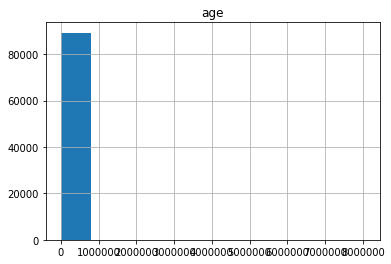

In [87]:
import numpy as np
import matplotlib.pyplot as plt
df_final.hist(column='age')

In [88]:
# count number of people with reasonable age
len(df_final[(df_final['age']>10)&(df_final['age']<=100)])

88930

In [89]:
temptemp = df_final[(df_final['age']>10)&(df_final['age']<=100)]

In [342]:
temptemp.head()

,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,country,op_sys,plan_type,payment_type,attribution_calc,number,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started,churn
0,20000062,base,comedy,expand regional access,27.301448,59.0,0.0,UAE,Android,base_uae_14_day_trial,Standard Charter,facebook,4,4.0,3.0,6.0,23.0,0.0,1.0,1.000000,0.750000,1.500000,5.750000,0.000000,0.250000,1
1,20000405,enhanced,comedy,access to exclusive content,33.101274,48.0,0.0,UAE,iOS,base_uae_14_day_trial,Standard Charter,facebook,4,5.0,4.0,13.0,17.0,0.0,1.0,1.250000,1.000000,3.250000,4.250000,0.000000,0.250000,1
3,20000685,base,comedy,other,25.851492,67.0,0.0,UAE,iOS,base_uae_14_day_trial,Standard Charter,referral,13,17.0,4.0,11.0,63.0,0.0,7.0,1.307692,0.307692,0.846154,4.846154,0.000000,0.538462,0
4,20000741,base,comedy,access to exclusive content,25.851492,75.0,0.0,UAE,Android,base_uae_14_day_trial,RAKBANK,facebook,2,1.0,1.0,2.0,7.0,0.0,0.0,0.500000,0.500000,1.000000,3.500000,0.000000,0.000000,1
5,20000796,enhanced,regional,replace OTT,22.951579,34.0,0.0,UAE,iOS,base_uae_14_day_trial,RAKBANK,facebook,15,78.0,28.0,67.0,72.0,1.0,14.0,5.200000,1.866667,4.466667,4.800000,0.066667,0.933333,0


In [90]:
temptemp.shape

(88930, 26)

In [91]:
temptemp.age.describe()

count    88930.000000
mean        45.453605
std         13.487404
min         18.000000
25%         35.000000
50%         45.000000
75%         56.000000
max         99.000000
Name: age, dtype: float64

In [92]:
df_final = df_final.fillna({'age': 45})

In [93]:
df_final.shape

(109152, 26)

In [94]:
len(df_final[(df_final['age']>10)&(df_final['age']<=100)])

108802

In [95]:
109152 - 108802

350

In [96]:
# we observe about 350 customers with unreasonable ages
# remove them from df_final as number is small

In [97]:
copy = df_final.copy()

In [ ]:
Python
# Get names of indexes for which column Age has value 30
indexNames = dfObj[ dfObj['Age'] == 30 ].index
# Delete these row indexes from dataFrame
dfObj.drop(indexNames , inplace=True)
1
2
3
4
5
# Get names of indexes for which column Age has value 30
indexNames = dfObj[ dfObj['Age'] == 30 ].index
 
# Delete these row indexes from dataFrame
dfObj.drop(indexNames , inplace=True)

In [98]:
indexNames = df_final[df_final['age'] < 10].index
df_final.drop(indexNames, inplace=True)

In [99]:
df_final.shape

(109118, 26)

In [100]:
copy = df_final.copy()

In [101]:
indexNames = df_final[df_final['age'] > 100].index
df_final.drop(indexNames, inplace=True)

In [102]:
df_final.shape

(108802, 26)

In [103]:
copy = df_final.copy()

In [104]:
df_final.isna().any()

subid                       False
package_type                False
preferred_genre             False
intended_use                False
weekly_consumption_hour     False
age                         False
male_TF                     False
country                     False
op_sys                      False
plan_type                   False
payment_type                False
attribution_calc            False
number                      False
sum_app_opens               False
sum_cust_service_mssgs      False
sum_num_videos_completed    False
sum_vid_more_30             False
sum_videos_rated            False
sum_series_started          False
avg_app_opens               False
avg_cust_service_mssgs      False
avg_num_videos_completed    False
avg_vid_more_30             False
avg_videos_rated            False
avg_series_started          False
churn                       False
dtype: bool

In [105]:
# here we have replaced all missing values from the dataset
df_final

,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,country,op_sys,plan_type,payment_type,attribution_calc,number,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started,churn
0,20000062,base,comedy,expand regional access,27.301448,59.0,0.0,UAE,Android,base_uae_14_day_trial,Standard Charter,facebook,4,4.0,3.0,6.0,23.0,0.0,1.0,1.000000,0.750000,1.500000,5.750000,0.0,0.250000,1
1,20000405,enhanced,comedy,access to exclusive content,33.101274,48.0,0.0,UAE,iOS,base_uae_14_day_trial,Standard Charter,facebook,4,5.0,4.0,13.0,17.0,0.0,1.0,1.250000,1.000000,3.250000,4.250000,0.0,0.250000,1
2,20000604,economy,comedy,replace OTT,27.830000,45.0,0.0,UAE,Android,base_uae_14_day_trial,Paypal,facebook,13,13.0,4.0,8.0,64.0,0.0,1.0,1.000000,0.307692,0.615385,4.923077,0.0,0.076923,0
3,20000685,base,comedy,other,25.851492,67.0,0.0,UAE,iOS,base_uae_14_day_trial,Standard Charter,referral,13,17.0,4.0,11.0,63.0,0.0,7.0,1.307692,0.307692,0.846154,4.846154,0.0,0.538462,0
4,20000741,base,comedy,access to exclusive content,25.851492,75.0,0.0,UAE,Android,base_uae_14_day_trial,RAKBANK,facebook,2,1.0,1.0,2.0,7.0,0.0,0.0,0.500000,0.500000,1.000000,3.500000,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109156,29999335,base,regional,supplement OTT,27.301448,23.0,0.0,UAE,Android,base_uae_14_day_trial,RAKBANK,facebook,12,12.0,5.0,54.0,62.0,0.0,8.0,1.000000,0.416667,4.500000,5.166667,0.0,0.666667,1
109157,29999524,enhanced,comedy,expand regional access,27.301448,69.0,0.0,UAE,iOS,base_uae_14_day_trial,Standard Charter,facebook,4,4.0,2.0,2.0,12.0,0.0,0.0,1.000000,0.500000,0.500000,3.000000,0.0,0.000000,1
109158,29999590,base,comedy,replace OTT,28.751405,38.0,0.0,UAE,iOS,base_uae_14_day_trial,Standard Charter,email,14,40.0,4.0,52.0,67.0,0.0,13.0,2.857143,0.285714,3.714286,4.785714,0.0,0.928571,0
109159,29999820,base,comedy,replace OTT,21.501623,66.0,0.0,UAE,iOS,base_uae_14_day_trial,RAKBANK,facebook,10,12.0,6.0,22.0,50.0,0.0,7.0,1.200000,0.600000,2.200000,5.000000,0.0,0.700000,1


In [106]:
df_final.reset_index(drop=True, inplace=True)

In [107]:
df_final

,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,country,op_sys,plan_type,payment_type,attribution_calc,number,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started,churn
0,20000062,base,comedy,expand regional access,27.301448,59.0,0.0,UAE,Android,base_uae_14_day_trial,Standard Charter,facebook,4,4.0,3.0,6.0,23.0,0.0,1.0,1.000000,0.750000,1.500000,5.750000,0.0,0.250000,1
1,20000405,enhanced,comedy,access to exclusive content,33.101274,48.0,0.0,UAE,iOS,base_uae_14_day_trial,Standard Charter,facebook,4,5.0,4.0,13.0,17.0,0.0,1.0,1.250000,1.000000,3.250000,4.250000,0.0,0.250000,1
2,20000604,economy,comedy,replace OTT,27.830000,45.0,0.0,UAE,Android,base_uae_14_day_trial,Paypal,facebook,13,13.0,4.0,8.0,64.0,0.0,1.0,1.000000,0.307692,0.615385,4.923077,0.0,0.076923,0
3,20000685,base,comedy,other,25.851492,67.0,0.0,UAE,iOS,base_uae_14_day_trial,Standard Charter,referral,13,17.0,4.0,11.0,63.0,0.0,7.0,1.307692,0.307692,0.846154,4.846154,0.0,0.538462,0
4,20000741,base,comedy,access to exclusive content,25.851492,75.0,0.0,UAE,Android,base_uae_14_day_trial,RAKBANK,facebook,2,1.0,1.0,2.0,7.0,0.0,0.0,0.500000,0.500000,1.000000,3.500000,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108797,29999335,base,regional,supplement OTT,27.301448,23.0,0.0,UAE,Android,base_uae_14_day_trial,RAKBANK,facebook,12,12.0,5.0,54.0,62.0,0.0,8.0,1.000000,0.416667,4.500000,5.166667,0.0,0.666667,1
108798,29999524,enhanced,comedy,expand regional access,27.301448,69.0,0.0,UAE,iOS,base_uae_14_day_trial,Standard Charter,facebook,4,4.0,2.0,2.0,12.0,0.0,0.0,1.000000,0.500000,0.500000,3.000000,0.0,0.000000,1
108799,29999590,base,comedy,replace OTT,28.751405,38.0,0.0,UAE,iOS,base_uae_14_day_trial,Standard Charter,email,14,40.0,4.0,52.0,67.0,0.0,13.0,2.857143,0.285714,3.714286,4.785714,0.0,0.928571,0
108800,29999820,base,comedy,replace OTT,21.501623,66.0,0.0,UAE,iOS,base_uae_14_day_trial,RAKBANK,facebook,10,12.0,6.0,22.0,50.0,0.0,7.0,1.200000,0.600000,2.200000,5.000000,0.0,0.700000,1


In [108]:
df_final_copy = df_final.copy()

# FINALLY I BUILD MY PREDICTION MODEL WAHHHHH

In [ ]:
# Separating with continuous and categorical variables. 
# 'Customer_id','Cust_Segment'
#cat = ['PBK_Ind', 'OccuCode', 'Gender','IncomeLevel', 'Marital_Status',
#       'Number_Children', 'Education_Level']
#num = ['age','Home_Ownership','FirstContactDay_re','Recency', 'Frequency', 'Monetary', 'pctg_online',
#       'pctg_overseas', 'pctg_alipay', 'pctg_tenpay', 'pctg_applepay',
#       '1.spending', '2.cash advance', '3.installment', '4.repayment', '5.fee',
#       '6.interest', '7.others', '8.Cash rebate']
#X_num = df[num]
#X_cat = df[cat]

# Creating dummy variable dataframe from categorical variables.
#df_X = X_num.join(pd.get_dummies(X_cat))

# LOGISTIC REGRESSION

In [124]:
# I need to separate continuous and categorical variables

In [125]:
df_final.country.value_counts()

UAE    108802
Name: country, dtype: int64

In [126]:
df_final = df_final.drop(['country'],axis=1)

In [127]:
cat = ['package_type','preferred_genre','intended_use','op_sys','plan_type','payment_type','attribution_calc']
num = ['weekly_consumption_hour', 'age', 'male_TF','number', 'sum_app_opens','sum_cust_service_mssgs', 
       'sum_num_videos_completed', 'sum_vid_more_30','sum_videos_rated', 'sum_series_started', 'avg_app_opens',
       'avg_cust_service_mssgs', 'avg_num_videos_completed', 'avg_vid_more_30','avg_videos_rated', 'avg_series_started']
X_num = df_final[num]
X_cat = df_final[cat]

#creating dummy variable dataframe
df_X = X_num.join(pd.get_dummies(X_cat))

In [128]:
df_X

,weekly_consumption_hour,age,male_TF,number,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,op_sys_Android,op_sys_iOS,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,payment_type_Apple Pay,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,attribution_calc_affiliate,attribution_calc_email,attribution_calc_email_blast,attribution_calc_facebook,attribution_calc_pinterest,attribution_calc_referral,attribution_calc_search
0,27.301448,59.0,0.0,4,4.0,3.0,6.0,23.0,0.0,1.0,1.000000,0.750000,1.500000,5.750000,0.0,0.250000,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,33.101274,48.0,0.0,4,5.0,4.0,13.0,17.0,0.0,1.0,1.250000,1.000000,3.250000,4.250000,0.0,0.250000,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,27.830000,45.0,0.0,13,13.0,4.0,8.0,64.0,0.0,1.0,1.000000,0.307692,0.615385,4.923077,0.0,0.076923,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,25.851492,67.0,0.0,13,17.0,4.0,11.0,63.0,0.0,7.0,1.307692,0.307692,0.846154,4.846154,0.0,0.538462,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,25.851492,75.0,0.0,2,1.0,1.0,2.0,7.0,0.0,0.0,0.500000,0.500000,1.000000,3.500000,0.0,0.000000,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108797,27.301448,23.0,0.0,12,12.0,5.0,54.0,62.0,0.0,8.0,1.000000,0.416667,4.500000,5.166667,0.0,0.666667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
108798,27.301448,69.0,0.0,4,4.0,2.0,2.0,12.0,0.0,0.0,1.000000,0.500000,0.500000,3.000000,0.0,0.000000,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
108799,28.751405,38.0,0.0,14,40.0,4.0,52.0,67.0,0.0,13.0,2.857143,0.285714,3.714286,4.785714,0.0,0.928571,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
108800,21.501623,66.0,0.0,10,12.0,6.0,22.0,50.0,0.0,7.0,1.200000,0.600000,2.200000,5.000000,0.0,0.700000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [129]:
df_y = df_final['churn']

In [130]:
from sklearn.model_selection import train_test_split
X = df_X
y = df_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 0)

In [131]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train[num])
X_test_scale = scaler.transform(X_test[num])

In [132]:
# feature scaling
X_train[num]= X_train_scale
X_test[num] = X_test_scale

C:\Users\jenni\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jenni\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\jenni\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

In [133]:
# feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 15)
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

C:\Users\jenni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jenni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jenni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jenni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jenni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Num Features: 15
Selected Features: [ True  True  True False  True False  True  True  True  True  True  True
  True False  True  True False False False False False False False False
 False False False False False False False  True False False False False
  True False False False False False False False False False False False
 False False False]
Feature Ranking: [ 1  1  1 29  1  3  1  1  1  1  1  1  1 14  1  1 10 32 11 23 24 31 25 22
 33 34 26 27 12 15 36  1 28  9 35 37  1  4  2 30 16 17 19 18  5  6 20  8
  7 13 21]


In [134]:
X_test.columns

Index(['weekly_consumption_hour', 'age', 'male_TF', 'number', 'sum_app_opens',
       'sum_cust_service_mssgs', 'sum_num_videos_completed', 'sum_vid_more_30',
       'sum_videos_rated', 'sum_series_started', 'avg_app_opens',
       'avg_cust_service_mssgs', 'avg_num_videos_completed', 'avg_vid_more_30',
       'avg_videos_rated', 'avg_series_started', 'package_type_base',
       'package_type_economy', 'package_type_enhanced',
       'preferred_genre_comedy', 'preferred_genre_drama',
       'preferred_genre_international', 'preferred_genre_other',
       'preferred_genre_regional', 'intended_use_access to exclusive content',
       'intended_use_education', 'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT',
       'op_sys_Android', 'op_sys_iOS', 'plan_type_base_eur_14_day_trial',
       'plan_type_base_uae_14_day_trial', 'plan_type_high_aud_14_day_trial',
     

C:\Users\jenni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 9890  4026]
 [ 2222 16503]]
              precision    recall  f1-score   support

           0       0.82      0.71      0.76     13916
           1       0.80      0.88      0.84     18725

    accuracy                           0.81     32641
   macro avg       0.81      0.80      0.80     32641
weighted avg       0.81      0.81      0.81     32641

Test accuracy:0.81
Training accuracy: 0.809968356507924
Coefficient of each feature: [[-1.10112044e+00 -5.69455034e-01 -3.30076804e-01  4.00042708e-01
  -4.44862391e+01 -1.20219768e+00 -2.80946787e+00  7.26816626e-01
   0.00000000e+00 -5.73895819e+00  4.53058666e+01  1.72459352e+01
   1.75019677e+00 -1.58233906e+00 -2.42413579e+01  7.64448079e+00
   5.09132230e-02 -1.12137181e-01  0.00000000e+00  7.50962731e-03
   0.00000000e+00 -3.00901834e-02  0.00000000e+00  1.02603246e-02
  -8.74147330e-02 -1.26317495e-02  2.63681223e-02  1.01907340e-02
   4.65864527e-02  0.00000000e+00 -8.00799035e-02  5.19753944e-01
   0.00000000e+00  0.00000000

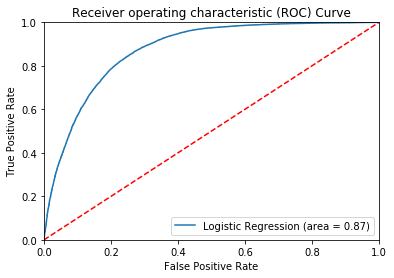

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt

logmodel = LogisticRegression(C=0.5, max_iter=120, penalty='l1')
logmodel.fit(X_train,y_train)
pred_log = logmodel.predict(X_test)
prob_log = logmodel.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test,pred_log))
print(classification_report(y_test,pred_log))
print('Test accuracy:{:.2f}'.format(logmodel.score(X_test, y_test)))
print('Training accuracy:', logmodel.score(X_train, y_train))
print('Coefficient of each feature:', logmodel.coef_)

roc_value = roc_auc_score(y_test, prob_log)
fpr, tpr, thresholds = roc_curve(y_test,prob_log)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_value)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# CATBOOST

In [136]:
forcatboost = df_final

In [137]:
forcatboost

,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys,plan_type,payment_type,attribution_calc,number,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started,churn
0,20000062,base,comedy,expand regional access,27.301448,59.0,0.0,Android,base_uae_14_day_trial,Standard Charter,facebook,4,4.0,3.0,6.0,23.0,0.0,1.0,1.000000,0.750000,1.500000,5.750000,0.0,0.250000,1
1,20000405,enhanced,comedy,access to exclusive content,33.101274,48.0,0.0,iOS,base_uae_14_day_trial,Standard Charter,facebook,4,5.0,4.0,13.0,17.0,0.0,1.0,1.250000,1.000000,3.250000,4.250000,0.0,0.250000,1
2,20000604,economy,comedy,replace OTT,27.830000,45.0,0.0,Android,base_uae_14_day_trial,Paypal,facebook,13,13.0,4.0,8.0,64.0,0.0,1.0,1.000000,0.307692,0.615385,4.923077,0.0,0.076923,0
3,20000685,base,comedy,other,25.851492,67.0,0.0,iOS,base_uae_14_day_trial,Standard Charter,referral,13,17.0,4.0,11.0,63.0,0.0,7.0,1.307692,0.307692,0.846154,4.846154,0.0,0.538462,0
4,20000741,base,comedy,access to exclusive content,25.851492,75.0,0.0,Android,base_uae_14_day_trial,RAKBANK,facebook,2,1.0,1.0,2.0,7.0,0.0,0.0,0.500000,0.500000,1.000000,3.500000,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108797,29999335,base,regional,supplement OTT,27.301448,23.0,0.0,Android,base_uae_14_day_trial,RAKBANK,facebook,12,12.0,5.0,54.0,62.0,0.0,8.0,1.000000,0.416667,4.500000,5.166667,0.0,0.666667,1
108798,29999524,enhanced,comedy,expand regional access,27.301448,69.0,0.0,iOS,base_uae_14_day_trial,Standard Charter,facebook,4,4.0,2.0,2.0,12.0,0.0,0.0,1.000000,0.500000,0.500000,3.000000,0.0,0.000000,1
108799,29999590,base,comedy,replace OTT,28.751405,38.0,0.0,iOS,base_uae_14_day_trial,Standard Charter,email,14,40.0,4.0,52.0,67.0,0.0,13.0,2.857143,0.285714,3.714286,4.785714,0.0,0.928571,0
108800,29999820,base,comedy,replace OTT,21.501623,66.0,0.0,iOS,base_uae_14_day_trial,RAKBANK,facebook,10,12.0,6.0,22.0,50.0,0.0,7.0,1.200000,0.600000,2.200000,5.000000,0.0,0.700000,1


In [138]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostClassifier

In [139]:
X1 = forcatboost.drop(['subid','churn'],axis=1)
y1 = forcatboost['churn']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=.3, random_state = 0)

In [140]:
categorical_features_indices = np.where(X1.dtypes != np.float)[0]

In [141]:
model = CatBoostClassifier()
model.fit(X_train1, y_train1,cat_features=categorical_features_indices,eval_set=(X_test1, y_test1))

Learning rate set to 0.092405
0:	learn: 0.6089993	test: 0.6088373	best: 0.6088373 (0)	total: 279ms	remaining: 4m 38s
1:	learn: 0.5576225	test: 0.5576140	best: 0.5576140 (1)	total: 554ms	remaining: 4m 36s
2:	learn: 0.5104435	test: 0.5108970	best: 0.5108970 (2)	total: 815ms	remaining: 4m 30s
3:	learn: 0.4780465	test: 0.4785866	best: 0.4785866 (3)	total: 1.05s	remaining: 4m 22s
4:	learn: 0.4519549	test: 0.4525240	best: 0.4525240 (4)	total: 1.31s	remaining: 4m 20s
5:	learn: 0.4207808	test: 0.4213842	best: 0.4213842 (5)	total: 1.57s	remaining: 4m 20s
6:	learn: 0.3969023	test: 0.3975364	best: 0.3975364 (6)	total: 1.81s	remaining: 4m 16s
7:	learn: 0.3789697	test: 0.3799062	best: 0.3799062 (7)	total: 2.02s	remaining: 4m 11s
8:	learn: 0.3644619	test: 0.3655596	best: 0.3655596 (8)	total: 2.25s	remaining: 4m 7s
9:	learn: 0.3550327	test: 0.3563412	best: 0.3563412 (9)	total: 2.49s	remaining: 4m 6s
10:	learn: 0.3446328	test: 0.3459380	best: 0.3459380 (10)	total: 2.68s	remaining: 4m
11:	learn: 0.3358

94:	learn: 0.2711433	test: 0.2772641	best: 0.2772641 (94)	total: 20s	remaining: 3m 10s
95:	learn: 0.2710268	test: 0.2771932	best: 0.2771932 (95)	total: 20.2s	remaining: 3m 10s
96:	learn: 0.2708862	test: 0.2770712	best: 0.2770712 (96)	total: 20.4s	remaining: 3m 10s
97:	learn: 0.2708261	test: 0.2770482	best: 0.2770482 (97)	total: 20.6s	remaining: 3m 9s
98:	learn: 0.2705061	test: 0.2767424	best: 0.2767424 (98)	total: 20.8s	remaining: 3m 9s
99:	learn: 0.2703996	test: 0.2766885	best: 0.2766885 (99)	total: 21s	remaining: 3m 8s
100:	learn: 0.2703069	test: 0.2766081	best: 0.2766081 (100)	total: 21.2s	remaining: 3m 8s
101:	learn: 0.2701379	test: 0.2764685	best: 0.2764685 (101)	total: 21.4s	remaining: 3m 8s
102:	learn: 0.2700216	test: 0.2763517	best: 0.2763517 (102)	total: 21.6s	remaining: 3m 7s
103:	learn: 0.2697927	test: 0.2761853	best: 0.2761853 (103)	total: 21.8s	remaining: 3m 7s
104:	learn: 0.2694925	test: 0.2759102	best: 0.2759102 (104)	total: 22s	remaining: 3m 7s
105:	learn: 0.2691659	tes

185:	learn: 0.2606217	test: 0.2712167	best: 0.2712079 (184)	total: 37.9s	remaining: 2m 45s
186:	learn: 0.2604840	test: 0.2711447	best: 0.2711447 (186)	total: 38.1s	remaining: 2m 45s
187:	learn: 0.2604732	test: 0.2711464	best: 0.2711447 (186)	total: 38.3s	remaining: 2m 45s
188:	learn: 0.2604186	test: 0.2711358	best: 0.2711358 (188)	total: 38.4s	remaining: 2m 44s
189:	learn: 0.2603748	test: 0.2711177	best: 0.2711177 (189)	total: 38.6s	remaining: 2m 44s
190:	learn: 0.2603399	test: 0.2711100	best: 0.2711100 (190)	total: 38.8s	remaining: 2m 44s
191:	learn: 0.2602189	test: 0.2710482	best: 0.2710482 (191)	total: 39s	remaining: 2m 44s
192:	learn: 0.2602159	test: 0.2710454	best: 0.2710454 (192)	total: 39.2s	remaining: 2m 43s
193:	learn: 0.2601474	test: 0.2710208	best: 0.2710208 (193)	total: 39.4s	remaining: 2m 43s
194:	learn: 0.2600851	test: 0.2710312	best: 0.2710208 (193)	total: 39.6s	remaining: 2m 43s
195:	learn: 0.2600541	test: 0.2710041	best: 0.2710041 (195)	total: 39.8s	remaining: 2m 43s
1

276:	learn: 0.2550185	test: 0.2694073	best: 0.2694073 (276)	total: 56.4s	remaining: 2m 27s
277:	learn: 0.2548828	test: 0.2693245	best: 0.2693245 (277)	total: 56.6s	remaining: 2m 26s
278:	learn: 0.2548068	test: 0.2693146	best: 0.2693146 (278)	total: 56.8s	remaining: 2m 26s
279:	learn: 0.2546759	test: 0.2692925	best: 0.2692925 (279)	total: 57s	remaining: 2m 26s
280:	learn: 0.2546110	test: 0.2692926	best: 0.2692925 (279)	total: 57.2s	remaining: 2m 26s
281:	learn: 0.2545492	test: 0.2692925	best: 0.2692925 (279)	total: 57.4s	remaining: 2m 26s
282:	learn: 0.2544444	test: 0.2692991	best: 0.2692925 (279)	total: 57.6s	remaining: 2m 26s
283:	learn: 0.2543867	test: 0.2693163	best: 0.2692925 (279)	total: 57.8s	remaining: 2m 25s
284:	learn: 0.2543040	test: 0.2693202	best: 0.2692925 (279)	total: 58.1s	remaining: 2m 25s
285:	learn: 0.2542936	test: 0.2693141	best: 0.2692925 (279)	total: 58.3s	remaining: 2m 25s
286:	learn: 0.2542821	test: 0.2692982	best: 0.2692925 (279)	total: 58.5s	remaining: 2m 25s
2

366:	learn: 0.2502814	test: 0.2685506	best: 0.2685299 (364)	total: 1m 14s	remaining: 2m 9s
367:	learn: 0.2502808	test: 0.2685508	best: 0.2685299 (364)	total: 1m 15s	remaining: 2m 9s
368:	learn: 0.2502428	test: 0.2685490	best: 0.2685299 (364)	total: 1m 15s	remaining: 2m 8s
369:	learn: 0.2501334	test: 0.2684974	best: 0.2684974 (369)	total: 1m 15s	remaining: 2m 8s
370:	learn: 0.2500361	test: 0.2684980	best: 0.2684974 (369)	total: 1m 15s	remaining: 2m 8s
371:	learn: 0.2500319	test: 0.2684994	best: 0.2684974 (369)	total: 1m 16s	remaining: 2m 8s
372:	learn: 0.2499913	test: 0.2684941	best: 0.2684941 (372)	total: 1m 16s	remaining: 2m 8s
373:	learn: 0.2499192	test: 0.2684721	best: 0.2684721 (373)	total: 1m 16s	remaining: 2m 7s
374:	learn: 0.2498690	test: 0.2684633	best: 0.2684633 (374)	total: 1m 16s	remaining: 2m 7s
375:	learn: 0.2498399	test: 0.2684660	best: 0.2684633 (374)	total: 1m 16s	remaining: 2m 7s
376:	learn: 0.2498353	test: 0.2684661	best: 0.2684633 (374)	total: 1m 17s	remaining: 2m 7s

456:	learn: 0.2465915	test: 0.2682520	best: 0.2682520 (456)	total: 1m 33s	remaining: 1m 51s
457:	learn: 0.2465157	test: 0.2682514	best: 0.2682514 (457)	total: 1m 33s	remaining: 1m 51s
458:	learn: 0.2464204	test: 0.2682393	best: 0.2682393 (458)	total: 1m 34s	remaining: 1m 51s
459:	learn: 0.2463428	test: 0.2682401	best: 0.2682393 (458)	total: 1m 34s	remaining: 1m 50s
460:	learn: 0.2462925	test: 0.2682352	best: 0.2682352 (460)	total: 1m 34s	remaining: 1m 50s
461:	learn: 0.2462830	test: 0.2682341	best: 0.2682341 (461)	total: 1m 34s	remaining: 1m 50s
462:	learn: 0.2462739	test: 0.2682334	best: 0.2682334 (462)	total: 1m 35s	remaining: 1m 50s
463:	learn: 0.2462735	test: 0.2682333	best: 0.2682333 (463)	total: 1m 35s	remaining: 1m 49s
464:	learn: 0.2462177	test: 0.2682413	best: 0.2682333 (463)	total: 1m 35s	remaining: 1m 49s
465:	learn: 0.2461859	test: 0.2682343	best: 0.2682333 (463)	total: 1m 35s	remaining: 1m 49s
466:	learn: 0.2461836	test: 0.2682346	best: 0.2682333 (463)	total: 1m 35s	remain

546:	learn: 0.2427559	test: 0.2678946	best: 0.2678674 (544)	total: 1m 52s	remaining: 1m 32s
547:	learn: 0.2427264	test: 0.2678886	best: 0.2678674 (544)	total: 1m 52s	remaining: 1m 32s
548:	learn: 0.2427158	test: 0.2678903	best: 0.2678674 (544)	total: 1m 52s	remaining: 1m 32s
549:	learn: 0.2426427	test: 0.2679038	best: 0.2678674 (544)	total: 1m 52s	remaining: 1m 32s
550:	learn: 0.2425758	test: 0.2679044	best: 0.2678674 (544)	total: 1m 53s	remaining: 1m 32s
551:	learn: 0.2424963	test: 0.2678993	best: 0.2678674 (544)	total: 1m 53s	remaining: 1m 31s
552:	learn: 0.2424594	test: 0.2678833	best: 0.2678674 (544)	total: 1m 53s	remaining: 1m 31s
553:	learn: 0.2424258	test: 0.2678854	best: 0.2678674 (544)	total: 1m 53s	remaining: 1m 31s
554:	learn: 0.2424223	test: 0.2678862	best: 0.2678674 (544)	total: 1m 53s	remaining: 1m 31s
555:	learn: 0.2424001	test: 0.2678870	best: 0.2678674 (544)	total: 1m 54s	remaining: 1m 31s
556:	learn: 0.2423929	test: 0.2678884	best: 0.2678674 (544)	total: 1m 54s	remain

636:	learn: 0.2394898	test: 0.2679899	best: 0.2678674 (544)	total: 2m 10s	remaining: 1m 14s
637:	learn: 0.2394285	test: 0.2679808	best: 0.2678674 (544)	total: 2m 10s	remaining: 1m 14s
638:	learn: 0.2394230	test: 0.2679808	best: 0.2678674 (544)	total: 2m 11s	remaining: 1m 14s
639:	learn: 0.2393736	test: 0.2680077	best: 0.2678674 (544)	total: 2m 11s	remaining: 1m 13s
640:	learn: 0.2393346	test: 0.2680085	best: 0.2678674 (544)	total: 2m 11s	remaining: 1m 13s
641:	learn: 0.2393201	test: 0.2680064	best: 0.2678674 (544)	total: 2m 11s	remaining: 1m 13s
642:	learn: 0.2393153	test: 0.2680119	best: 0.2678674 (544)	total: 2m 11s	remaining: 1m 13s
643:	learn: 0.2392878	test: 0.2680140	best: 0.2678674 (544)	total: 2m 12s	remaining: 1m 12s
644:	learn: 0.2392581	test: 0.2680230	best: 0.2678674 (544)	total: 2m 12s	remaining: 1m 12s
645:	learn: 0.2392244	test: 0.2680372	best: 0.2678674 (544)	total: 2m 12s	remaining: 1m 12s
646:	learn: 0.2391623	test: 0.2680545	best: 0.2678674 (544)	total: 2m 12s	remain

726:	learn: 0.2359915	test: 0.2680163	best: 0.2678674 (544)	total: 2m 29s	remaining: 56.3s
727:	learn: 0.2359560	test: 0.2680196	best: 0.2678674 (544)	total: 2m 30s	remaining: 56.1s
728:	learn: 0.2359534	test: 0.2680199	best: 0.2678674 (544)	total: 2m 30s	remaining: 55.9s
729:	learn: 0.2359483	test: 0.2680190	best: 0.2678674 (544)	total: 2m 30s	remaining: 55.7s
730:	learn: 0.2359372	test: 0.2680168	best: 0.2678674 (544)	total: 2m 30s	remaining: 55.5s
731:	learn: 0.2359012	test: 0.2680131	best: 0.2678674 (544)	total: 2m 30s	remaining: 55.3s
732:	learn: 0.2358691	test: 0.2680178	best: 0.2678674 (544)	total: 2m 31s	remaining: 55.1s
733:	learn: 0.2358615	test: 0.2680171	best: 0.2678674 (544)	total: 2m 31s	remaining: 54.9s
734:	learn: 0.2357945	test: 0.2680290	best: 0.2678674 (544)	total: 2m 31s	remaining: 54.7s
735:	learn: 0.2357860	test: 0.2680315	best: 0.2678674 (544)	total: 2m 31s	remaining: 54.4s
736:	learn: 0.2357687	test: 0.2680299	best: 0.2678674 (544)	total: 2m 31s	remaining: 54.2s

817:	learn: 0.2328217	test: 0.2681173	best: 0.2678674 (544)	total: 2m 49s	remaining: 37.6s
818:	learn: 0.2328127	test: 0.2681161	best: 0.2678674 (544)	total: 2m 49s	remaining: 37.4s
819:	learn: 0.2328042	test: 0.2681191	best: 0.2678674 (544)	total: 2m 49s	remaining: 37.2s
820:	learn: 0.2327724	test: 0.2681435	best: 0.2678674 (544)	total: 2m 49s	remaining: 37s
821:	learn: 0.2327097	test: 0.2681484	best: 0.2678674 (544)	total: 2m 49s	remaining: 36.8s
822:	learn: 0.2326948	test: 0.2681479	best: 0.2678674 (544)	total: 2m 50s	remaining: 36.6s
823:	learn: 0.2326913	test: 0.2681494	best: 0.2678674 (544)	total: 2m 50s	remaining: 36.4s
824:	learn: 0.2326899	test: 0.2681495	best: 0.2678674 (544)	total: 2m 50s	remaining: 36.2s
825:	learn: 0.2326398	test: 0.2681501	best: 0.2678674 (544)	total: 2m 50s	remaining: 36s
826:	learn: 0.2326296	test: 0.2681534	best: 0.2678674 (544)	total: 2m 50s	remaining: 35.8s
827:	learn: 0.2325938	test: 0.2681598	best: 0.2678674 (544)	total: 2m 51s	remaining: 35.6s
828

908:	learn: 0.2295399	test: 0.2682331	best: 0.2678674 (544)	total: 3m 8s	remaining: 18.8s
909:	learn: 0.2295171	test: 0.2682208	best: 0.2678674 (544)	total: 3m 8s	remaining: 18.6s
910:	learn: 0.2294946	test: 0.2682142	best: 0.2678674 (544)	total: 3m 8s	remaining: 18.4s
911:	learn: 0.2294507	test: 0.2681969	best: 0.2678674 (544)	total: 3m 8s	remaining: 18.2s
912:	learn: 0.2293827	test: 0.2682046	best: 0.2678674 (544)	total: 3m 9s	remaining: 18s
913:	learn: 0.2293595	test: 0.2681973	best: 0.2678674 (544)	total: 3m 9s	remaining: 17.8s
914:	learn: 0.2293507	test: 0.2681971	best: 0.2678674 (544)	total: 3m 9s	remaining: 17.6s
915:	learn: 0.2293266	test: 0.2681992	best: 0.2678674 (544)	total: 3m 9s	remaining: 17.4s
916:	learn: 0.2293016	test: 0.2682004	best: 0.2678674 (544)	total: 3m 9s	remaining: 17.2s
917:	learn: 0.2292176	test: 0.2681894	best: 0.2678674 (544)	total: 3m 10s	remaining: 17s
918:	learn: 0.2291559	test: 0.2682148	best: 0.2678674 (544)	total: 3m 10s	remaining: 16.8s
919:	learn: 

999:	learn: 0.2264944	test: 0.2685122	best: 0.2678674 (544)	total: 3m 27s	remaining: 0us

bestTest = 0.2678674249
bestIteration = 544

Shrink model to first 545 iterations.


In [142]:
preds = model.predict(X_test1)

In [143]:
preds

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [144]:
pred_proba = model.predict_proba(X_test1)

In [148]:
print(pred_proba)

[[0.69219741 0.30780259]
 [0.02542574 0.97457426]
 [0.08405721 0.91594279]
 ...
 [0.10678324 0.89321676]
 [0.22519159 0.77480841]
 [0.9702695  0.0297305 ]]


In [146]:
print('Accuracy of CatBoost classifier on training set: {:.2f}'
     .format(model.score(X_train1, y_train1)))
print('Accuracy of CatBoost classifier on test set: {:.2f}'
     .format(model.score(X_test1, y_test1)))

Accuracy of CatBoost classifier on training set: 0.91
Accuracy of CatBoost classifier on test set: 0.90


In [147]:
from sklearn import metrics
model_matrix = metrics.confusion_matrix(y_test1, preds)
print(model_matrix)
print(metrics.f1_score(y_test1,preds))

[[11930  1986]
 [ 1272 17453]]
0.9146315899800859


In [149]:
model.get_feature_importance()

array([ 1.0471409 ,  1.02062636,  2.25483667, 22.99603014,  9.34133463,
        1.04682343,  2.09590254,  0.08114062,  1.44282083,  2.0538025 ,
       13.20666627,  0.67205177,  7.61831211,  1.42606076, 16.97275796,
        0.76159932,  0.36794287,  2.9728194 ,  4.07717776,  2.99955113,
        3.76349104,  0.5018189 ,  1.27929208])

In [150]:
X1.columns

Index(['package_type', 'preferred_genre', 'intended_use',
       'weekly_consumption_hour', 'age', 'male_TF', 'op_sys', 'plan_type',
       'payment_type', 'attribution_calc', 'number', 'sum_app_opens',
       'sum_cust_service_mssgs', 'sum_num_videos_completed', 'sum_vid_more_30',
       'sum_videos_rated', 'sum_series_started', 'avg_app_opens',
       'avg_cust_service_mssgs', 'avg_num_videos_completed', 'avg_vid_more_30',
       'avg_videos_rated', 'avg_series_started'],
      dtype='object')

In [151]:
# from the above feature importance, we see that some columns might not be important in determining churn or not
# hence we set up a new model without these features

In [231]:
forcatboost2 = df_final.copy()

In [197]:
forcatboost2

,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys,plan_type,payment_type,attribution_calc,number,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started,churn
0,20000062,base,comedy,expand regional access,27.301448,59.0,0.0,Android,base_uae_14_day_trial,Standard Charter,facebook,4,4.0,3.0,6.0,23.0,0.0,1.0,1.000000,0.750000,1.500000,5.750000,0.0,0.250000,1
1,20000405,enhanced,comedy,access to exclusive content,33.101274,48.0,0.0,iOS,base_uae_14_day_trial,Standard Charter,facebook,4,5.0,4.0,13.0,17.0,0.0,1.0,1.250000,1.000000,3.250000,4.250000,0.0,0.250000,1
2,20000604,economy,comedy,replace OTT,27.830000,45.0,0.0,Android,base_uae_14_day_trial,Paypal,facebook,13,13.0,4.0,8.0,64.0,0.0,1.0,1.000000,0.307692,0.615385,4.923077,0.0,0.076923,0
3,20000685,base,comedy,other,25.851492,67.0,0.0,iOS,base_uae_14_day_trial,Standard Charter,referral,13,17.0,4.0,11.0,63.0,0.0,7.0,1.307692,0.307692,0.846154,4.846154,0.0,0.538462,0
4,20000741,base,comedy,access to exclusive content,25.851492,75.0,0.0,Android,base_uae_14_day_trial,RAKBANK,facebook,2,1.0,1.0,2.0,7.0,0.0,0.0,0.500000,0.500000,1.000000,3.500000,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108797,29999335,base,regional,supplement OTT,27.301448,23.0,0.0,Android,base_uae_14_day_trial,RAKBANK,facebook,12,12.0,5.0,54.0,62.0,0.0,8.0,1.000000,0.416667,4.500000,5.166667,0.0,0.666667,1
108798,29999524,enhanced,comedy,expand regional access,27.301448,69.0,0.0,iOS,base_uae_14_day_trial,Standard Charter,facebook,4,4.0,2.0,2.0,12.0,0.0,0.0,1.000000,0.500000,0.500000,3.000000,0.0,0.000000,1
108799,29999590,base,comedy,replace OTT,28.751405,38.0,0.0,iOS,base_uae_14_day_trial,Standard Charter,email,14,40.0,4.0,52.0,67.0,0.0,13.0,2.857143,0.285714,3.714286,4.785714,0.0,0.928571,0
108800,29999820,base,comedy,replace OTT,21.501623,66.0,0.0,iOS,base_uae_14_day_trial,RAKBANK,facebook,10,12.0,6.0,22.0,50.0,0.0,7.0,1.200000,0.600000,2.200000,5.000000,0.0,0.700000,1


In [153]:
X2 = forcatboost2.drop(['subid','churn','plan_type','sum_app_opens','sum_videos_rated','sum_series_started','avg_videos_rated'],axis=1)
y2 = forcatboost2['churn']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=.3, random_state = 0)

In [154]:
categorical_features_indices2 = np.where(X2.dtypes != np.float)[0]

In [155]:
model2 = CatBoostClassifier()
model2.fit(X_train2, y_train2,cat_features=categorical_features_indices2,eval_set=(X_test2, y_test2))

Learning rate set to 0.092405
0:	learn: 0.6254906	test: 0.6256972	best: 0.6256972 (0)	total: 234ms	remaining: 3m 53s
1:	learn: 0.5571245	test: 0.5573123	best: 0.5573123 (1)	total: 441ms	remaining: 3m 39s
2:	learn: 0.5161390	test: 0.5165252	best: 0.5165252 (2)	total: 674ms	remaining: 3m 43s
3:	learn: 0.4818238	test: 0.4825056	best: 0.4825056 (3)	total: 891ms	remaining: 3m 41s
4:	learn: 0.4458694	test: 0.4464425	best: 0.4464425 (4)	total: 1.11s	remaining: 3m 41s
5:	learn: 0.4242319	test: 0.4251671	best: 0.4251671 (5)	total: 1.31s	remaining: 3m 36s
6:	learn: 0.3988286	test: 0.3996982	best: 0.3996982 (6)	total: 1.47s	remaining: 3m 28s
7:	learn: 0.3828981	test: 0.3839248	best: 0.3839248 (7)	total: 1.66s	remaining: 3m 26s
8:	learn: 0.3719955	test: 0.3731849	best: 0.3731849 (8)	total: 1.83s	remaining: 3m 21s
9:	learn: 0.3586826	test: 0.3597736	best: 0.3597736 (9)	total: 2s	remaining: 3m 18s
10:	learn: 0.3479349	test: 0.3490960	best: 0.3490960 (10)	total: 2.2s	remaining: 3m 17s
11:	learn: 0.34

93:	learn: 0.2721605	test: 0.2772927	best: 0.2772927 (93)	total: 16.8s	remaining: 2m 42s
94:	learn: 0.2720756	test: 0.2772635	best: 0.2772635 (94)	total: 17s	remaining: 2m 42s
95:	learn: 0.2719692	test: 0.2772090	best: 0.2772090 (95)	total: 17.2s	remaining: 2m 41s
96:	learn: 0.2717717	test: 0.2770061	best: 0.2770061 (96)	total: 17.3s	remaining: 2m 41s
97:	learn: 0.2716188	test: 0.2769239	best: 0.2769239 (97)	total: 17.6s	remaining: 2m 41s
98:	learn: 0.2714140	test: 0.2768083	best: 0.2768083 (98)	total: 17.7s	remaining: 2m 41s
99:	learn: 0.2713647	test: 0.2767796	best: 0.2767796 (99)	total: 17.9s	remaining: 2m 41s
100:	learn: 0.2712554	test: 0.2767105	best: 0.2767105 (100)	total: 18.1s	remaining: 2m 40s
101:	learn: 0.2711156	test: 0.2766920	best: 0.2766920 (101)	total: 18.3s	remaining: 2m 40s
102:	learn: 0.2709626	test: 0.2765517	best: 0.2765517 (102)	total: 18.5s	remaining: 2m 40s
103:	learn: 0.2708759	test: 0.2765188	best: 0.2765188 (103)	total: 18.7s	remaining: 2m 41s
104:	learn: 0.2

184:	learn: 0.2621235	test: 0.2719617	best: 0.2719617 (184)	total: 33.6s	remaining: 2m 27s
185:	learn: 0.2620188	test: 0.2719809	best: 0.2719617 (184)	total: 33.8s	remaining: 2m 27s
186:	learn: 0.2618864	test: 0.2718905	best: 0.2718905 (186)	total: 34s	remaining: 2m 27s
187:	learn: 0.2617485	test: 0.2717751	best: 0.2717751 (187)	total: 34.2s	remaining: 2m 27s
188:	learn: 0.2617037	test: 0.2717450	best: 0.2717450 (188)	total: 34.4s	remaining: 2m 27s
189:	learn: 0.2615886	test: 0.2717039	best: 0.2717039 (189)	total: 34.6s	remaining: 2m 27s
190:	learn: 0.2614977	test: 0.2716864	best: 0.2716864 (190)	total: 34.8s	remaining: 2m 27s
191:	learn: 0.2613957	test: 0.2716170	best: 0.2716170 (191)	total: 34.9s	remaining: 2m 27s
192:	learn: 0.2613456	test: 0.2715901	best: 0.2715901 (192)	total: 35.1s	remaining: 2m 26s
193:	learn: 0.2612939	test: 0.2715756	best: 0.2715756 (193)	total: 35.2s	remaining: 2m 26s
194:	learn: 0.2612429	test: 0.2715904	best: 0.2715756 (193)	total: 35.4s	remaining: 2m 26s
1

275:	learn: 0.2559753	test: 0.2702490	best: 0.2702449 (273)	total: 50.6s	remaining: 2m 12s
276:	learn: 0.2559614	test: 0.2702427	best: 0.2702427 (276)	total: 50.8s	remaining: 2m 12s
277:	learn: 0.2558865	test: 0.2702174	best: 0.2702174 (277)	total: 51s	remaining: 2m 12s
278:	learn: 0.2557908	test: 0.2702437	best: 0.2702174 (277)	total: 51.2s	remaining: 2m 12s
279:	learn: 0.2557331	test: 0.2702409	best: 0.2702174 (277)	total: 51.4s	remaining: 2m 12s
280:	learn: 0.2555978	test: 0.2701633	best: 0.2701633 (280)	total: 51.6s	remaining: 2m 11s
281:	learn: 0.2555229	test: 0.2701569	best: 0.2701569 (281)	total: 51.8s	remaining: 2m 11s
282:	learn: 0.2554642	test: 0.2701677	best: 0.2701569 (281)	total: 52s	remaining: 2m 11s
283:	learn: 0.2554573	test: 0.2701677	best: 0.2701569 (281)	total: 52.2s	remaining: 2m 11s
284:	learn: 0.2554294	test: 0.2701606	best: 0.2701569 (281)	total: 52.3s	remaining: 2m 11s
285:	learn: 0.2553518	test: 0.2701600	best: 0.2701569 (281)	total: 52.5s	remaining: 2m 11s
286

368:	learn: 0.2508798	test: 0.2694354	best: 0.2694354 (368)	total: 1m 8s	remaining: 1m 56s
369:	learn: 0.2507795	test: 0.2694205	best: 0.2694205 (369)	total: 1m 8s	remaining: 1m 56s
370:	learn: 0.2506989	test: 0.2694191	best: 0.2694191 (370)	total: 1m 8s	remaining: 1m 56s
371:	learn: 0.2506451	test: 0.2694156	best: 0.2694156 (371)	total: 1m 8s	remaining: 1m 56s
372:	learn: 0.2506054	test: 0.2694143	best: 0.2694143 (372)	total: 1m 8s	remaining: 1m 55s
373:	learn: 0.2506041	test: 0.2694118	best: 0.2694118 (373)	total: 1m 9s	remaining: 1m 55s
374:	learn: 0.2505861	test: 0.2694123	best: 0.2694118 (373)	total: 1m 9s	remaining: 1m 55s
375:	learn: 0.2505522	test: 0.2694149	best: 0.2694118 (373)	total: 1m 9s	remaining: 1m 55s
376:	learn: 0.2505073	test: 0.2694123	best: 0.2694118 (373)	total: 1m 9s	remaining: 1m 55s
377:	learn: 0.2504879	test: 0.2694135	best: 0.2694118 (373)	total: 1m 9s	remaining: 1m 54s
378:	learn: 0.2504271	test: 0.2693932	best: 0.2693932 (378)	total: 1m 9s	remaining: 1m 54s

458:	learn: 0.2465136	test: 0.2689606	best: 0.2689606 (458)	total: 1m 25s	remaining: 1m 40s
459:	learn: 0.2465069	test: 0.2689568	best: 0.2689568 (459)	total: 1m 25s	remaining: 1m 40s
460:	learn: 0.2464401	test: 0.2689526	best: 0.2689526 (460)	total: 1m 25s	remaining: 1m 40s
461:	learn: 0.2464358	test: 0.2689522	best: 0.2689522 (461)	total: 1m 25s	remaining: 1m 40s
462:	learn: 0.2463770	test: 0.2689458	best: 0.2689458 (462)	total: 1m 26s	remaining: 1m 39s
463:	learn: 0.2463652	test: 0.2689462	best: 0.2689458 (462)	total: 1m 26s	remaining: 1m 39s
464:	learn: 0.2463356	test: 0.2689520	best: 0.2689458 (462)	total: 1m 26s	remaining: 1m 39s
465:	learn: 0.2463157	test: 0.2689471	best: 0.2689458 (462)	total: 1m 26s	remaining: 1m 39s
466:	learn: 0.2462935	test: 0.2689448	best: 0.2689448 (466)	total: 1m 27s	remaining: 1m 39s
467:	learn: 0.2462690	test: 0.2689594	best: 0.2689448 (466)	total: 1m 27s	remaining: 1m 39s
468:	learn: 0.2462377	test: 0.2689473	best: 0.2689448 (466)	total: 1m 27s	remain

549:	learn: 0.2429312	test: 0.2689930	best: 0.2689314 (491)	total: 1m 42s	remaining: 1m 24s
550:	learn: 0.2428875	test: 0.2689948	best: 0.2689314 (491)	total: 1m 43s	remaining: 1m 23s
551:	learn: 0.2428682	test: 0.2689958	best: 0.2689314 (491)	total: 1m 43s	remaining: 1m 23s
552:	learn: 0.2427865	test: 0.2689938	best: 0.2689314 (491)	total: 1m 43s	remaining: 1m 23s
553:	learn: 0.2427785	test: 0.2689909	best: 0.2689314 (491)	total: 1m 43s	remaining: 1m 23s
554:	learn: 0.2427658	test: 0.2689886	best: 0.2689314 (491)	total: 1m 43s	remaining: 1m 23s
555:	learn: 0.2427197	test: 0.2689738	best: 0.2689314 (491)	total: 1m 43s	remaining: 1m 23s
556:	learn: 0.2426462	test: 0.2689504	best: 0.2689314 (491)	total: 1m 44s	remaining: 1m 22s
557:	learn: 0.2426136	test: 0.2689583	best: 0.2689314 (491)	total: 1m 44s	remaining: 1m 22s
558:	learn: 0.2425993	test: 0.2689598	best: 0.2689314 (491)	total: 1m 44s	remaining: 1m 22s
559:	learn: 0.2425418	test: 0.2689577	best: 0.2689314 (491)	total: 1m 44s	remain

640:	learn: 0.2394250	test: 0.2690314	best: 0.2689177 (589)	total: 2m	remaining: 1m 7s
641:	learn: 0.2393511	test: 0.2690327	best: 0.2689177 (589)	total: 2m	remaining: 1m 7s
642:	learn: 0.2392884	test: 0.2690276	best: 0.2689177 (589)	total: 2m	remaining: 1m 7s
643:	learn: 0.2392534	test: 0.2690158	best: 0.2689177 (589)	total: 2m 1s	remaining: 1m 6s
644:	learn: 0.2392040	test: 0.2690427	best: 0.2689177 (589)	total: 2m 1s	remaining: 1m 6s
645:	learn: 0.2391727	test: 0.2690665	best: 0.2689177 (589)	total: 2m 1s	remaining: 1m 6s
646:	learn: 0.2391694	test: 0.2690668	best: 0.2689177 (589)	total: 2m 1s	remaining: 1m 6s
647:	learn: 0.2391342	test: 0.2690798	best: 0.2689177 (589)	total: 2m 1s	remaining: 1m 6s
648:	learn: 0.2391191	test: 0.2690772	best: 0.2689177 (589)	total: 2m 1s	remaining: 1m 5s
649:	learn: 0.2390932	test: 0.2690759	best: 0.2689177 (589)	total: 2m 2s	remaining: 1m 5s
650:	learn: 0.2390428	test: 0.2690624	best: 0.2689177 (589)	total: 2m 2s	remaining: 1m 5s
651:	learn: 0.23898

731:	learn: 0.2357269	test: 0.2691384	best: 0.2689177 (589)	total: 2m 18s	remaining: 50.7s
732:	learn: 0.2356590	test: 0.2691755	best: 0.2689177 (589)	total: 2m 18s	remaining: 50.5s
733:	learn: 0.2356415	test: 0.2691768	best: 0.2689177 (589)	total: 2m 18s	remaining: 50.3s
734:	learn: 0.2356403	test: 0.2691759	best: 0.2689177 (589)	total: 2m 18s	remaining: 50.1s
735:	learn: 0.2356341	test: 0.2691755	best: 0.2689177 (589)	total: 2m 19s	remaining: 49.9s
736:	learn: 0.2356296	test: 0.2691765	best: 0.2689177 (589)	total: 2m 19s	remaining: 49.8s
737:	learn: 0.2356028	test: 0.2691768	best: 0.2689177 (589)	total: 2m 19s	remaining: 49.6s
738:	learn: 0.2355378	test: 0.2691658	best: 0.2689177 (589)	total: 2m 19s	remaining: 49.4s
739:	learn: 0.2354931	test: 0.2691779	best: 0.2689177 (589)	total: 2m 20s	remaining: 49.2s
740:	learn: 0.2354225	test: 0.2691933	best: 0.2689177 (589)	total: 2m 20s	remaining: 49s
741:	learn: 0.2354023	test: 0.2691819	best: 0.2689177 (589)	total: 2m 20s	remaining: 48.8s
7

823:	learn: 0.2326713	test: 0.2694450	best: 0.2689177 (589)	total: 2m 36s	remaining: 33.4s
824:	learn: 0.2326289	test: 0.2694388	best: 0.2689177 (589)	total: 2m 36s	remaining: 33.3s
825:	learn: 0.2325806	test: 0.2694231	best: 0.2689177 (589)	total: 2m 36s	remaining: 33.1s
826:	learn: 0.2325491	test: 0.2694162	best: 0.2689177 (589)	total: 2m 37s	remaining: 32.9s
827:	learn: 0.2325356	test: 0.2694165	best: 0.2689177 (589)	total: 2m 37s	remaining: 32.7s
828:	learn: 0.2324728	test: 0.2694369	best: 0.2689177 (589)	total: 2m 37s	remaining: 32.5s
829:	learn: 0.2324127	test: 0.2694607	best: 0.2689177 (589)	total: 2m 37s	remaining: 32.3s
830:	learn: 0.2323586	test: 0.2694659	best: 0.2689177 (589)	total: 2m 37s	remaining: 32.1s
831:	learn: 0.2323015	test: 0.2694841	best: 0.2689177 (589)	total: 2m 38s	remaining: 31.9s
832:	learn: 0.2322656	test: 0.2694764	best: 0.2689177 (589)	total: 2m 38s	remaining: 31.7s
833:	learn: 0.2322030	test: 0.2694694	best: 0.2689177 (589)	total: 2m 38s	remaining: 31.5s

914:	learn: 0.2293014	test: 0.2695003	best: 0.2689177 (589)	total: 2m 54s	remaining: 16.2s
915:	learn: 0.2292494	test: 0.2694956	best: 0.2689177 (589)	total: 2m 54s	remaining: 16s
916:	learn: 0.2292315	test: 0.2694999	best: 0.2689177 (589)	total: 2m 54s	remaining: 15.8s
917:	learn: 0.2292248	test: 0.2694940	best: 0.2689177 (589)	total: 2m 55s	remaining: 15.6s
918:	learn: 0.2291926	test: 0.2694812	best: 0.2689177 (589)	total: 2m 55s	remaining: 15.4s
919:	learn: 0.2291515	test: 0.2694760	best: 0.2689177 (589)	total: 2m 55s	remaining: 15.3s
920:	learn: 0.2291084	test: 0.2694833	best: 0.2689177 (589)	total: 2m 55s	remaining: 15.1s
921:	learn: 0.2290478	test: 0.2694801	best: 0.2689177 (589)	total: 2m 55s	remaining: 14.9s
922:	learn: 0.2290430	test: 0.2694838	best: 0.2689177 (589)	total: 2m 56s	remaining: 14.7s
923:	learn: 0.2290029	test: 0.2694824	best: 0.2689177 (589)	total: 2m 56s	remaining: 14.5s
924:	learn: 0.2289663	test: 0.2694687	best: 0.2689177 (589)	total: 2m 56s	remaining: 14.3s
9

In [156]:
print('Accuracy of CatBoost classifier on training set: {:.2f}'
     .format(model2.score(X_train2, y_train2)))
print('Accuracy of CatBoost classifier on test set: {:.2f}'
     .format(model2.score(X_test2, y_test2)))

Accuracy of CatBoost classifier on training set: 0.91
Accuracy of CatBoost classifier on test set: 0.90


In [157]:
model2.get_feature_importance()

array([ 1.15794103,  1.37477094,  2.79604379, 27.96525905,  7.26360823,
        1.25938928,  2.10811148,  1.9827975 ,  2.30884875, 11.33741931,
        9.25362194,  2.3886531 , 11.04706171,  3.63975918,  4.47700531,
        3.18214397,  4.76963204,  1.68793341])

In [158]:
X2.columns

Index(['package_type', 'preferred_genre', 'intended_use',
       'weekly_consumption_hour', 'age', 'male_TF', 'op_sys', 'payment_type',
       'attribution_calc', 'number', 'sum_cust_service_mssgs',
       'sum_num_videos_completed', 'sum_vid_more_30', 'avg_app_opens',
       'avg_cust_service_mssgs', 'avg_num_videos_completed', 'avg_vid_more_30',
       'avg_series_started'],
      dtype='object')

In [183]:
X_test2.shape

(32641, 18)

In [184]:
y_test2.shape

(32641,)

In [185]:
X_test2.head()

,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys,payment_type,attribution_calc,number,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_series_started
103372,base,drama,education,27.830000,60.0,0.0,iOS,CBD,facebook,10,1.0,10.0,41.0,0.800000,0.100000,1.000000,4.100000,0.400000
47785,base,comedy,replace OTT,24.401536,28.0,0.0,iOS,Paypal,facebook,12,9.0,42.0,54.0,1.750000,0.750000,3.500000,4.500000,0.666667
24597,enhanced,other,replace OTT,27.301448,29.0,0.0,iOS,Standard Charter,search,4,2.0,18.0,23.0,4.250000,0.500000,4.500000,5.750000,0.750000
91844,base,regional,access to exclusive content,28.751405,56.0,0.0,Android,Standard Charter,facebook,14,4.0,53.0,68.0,1.000000,0.285714,3.785714,4.857143,0.928571
85199,base,drama,expand regional access,27.830000,24.0,0.0,iOS,Paypal,facebook,7,1.0,2.0,11.0,0.571429,0.142857,0.285714,1.571429,0.285714


In [186]:
y_test2.head()

103372    0
47785     1
24597     1
91844     1
85199     0
Name: churn, dtype: int64

In [187]:
# I want to check the prediction confusion matrix under different thresholds, so i want to use the test set results

In [215]:
model_evaluation = X_test2.copy()

In [216]:
model_evaluation.head()

,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys,payment_type,attribution_calc,number,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_series_started
103372,base,drama,education,27.830000,60.0,0.0,iOS,CBD,facebook,10,1.0,10.0,41.0,0.800000,0.100000,1.000000,4.100000,0.400000
47785,base,comedy,replace OTT,24.401536,28.0,0.0,iOS,Paypal,facebook,12,9.0,42.0,54.0,1.750000,0.750000,3.500000,4.500000,0.666667
24597,enhanced,other,replace OTT,27.301448,29.0,0.0,iOS,Standard Charter,search,4,2.0,18.0,23.0,4.250000,0.500000,4.500000,5.750000,0.750000
91844,base,regional,access to exclusive content,28.751405,56.0,0.0,Android,Standard Charter,facebook,14,4.0,53.0,68.0,1.000000,0.285714,3.785714,4.857143,0.928571
85199,base,drama,expand regional access,27.830000,24.0,0.0,iOS,Paypal,facebook,7,1.0,2.0,11.0,0.571429,0.142857,0.285714,1.571429,0.285714


In [217]:
model_evaluation['actual_churn_result'] = y_test2

In [218]:
model_evaluation

,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys,payment_type,attribution_calc,number,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_series_started,actual_churn_result
103372,base,drama,education,27.830000,60.0,0.0,iOS,CBD,facebook,10,1.0,10.0,41.0,0.800000,0.100000,1.000000,4.100000,0.400000,0
47785,base,comedy,replace OTT,24.401536,28.0,0.0,iOS,Paypal,facebook,12,9.0,42.0,54.0,1.750000,0.750000,3.500000,4.500000,0.666667,1
24597,enhanced,other,replace OTT,27.301448,29.0,0.0,iOS,Standard Charter,search,4,2.0,18.0,23.0,4.250000,0.500000,4.500000,5.750000,0.750000,1
91844,base,regional,access to exclusive content,28.751405,56.0,0.0,Android,Standard Charter,facebook,14,4.0,53.0,68.0,1.000000,0.285714,3.785714,4.857143,0.928571,1
85199,base,drama,expand regional access,27.830000,24.0,0.0,iOS,Paypal,facebook,7,1.0,2.0,11.0,0.571429,0.142857,0.285714,1.571429,0.285714,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62785,economy,comedy,replace OTT,25.851492,60.0,0.0,Android,Paypal,referral,4,3.0,21.0,23.0,1.000000,0.750000,5.250000,5.750000,0.750000,1
65484,base,comedy,expand international access,28.751405,21.0,0.0,iOS,RAKBANK,email_blast,13,12.0,60.0,63.0,1.692308,0.923077,4.615385,4.846154,0.923077,1
29258,enhanced,comedy,access to exclusive content,41.801011,25.0,1.0,Android,Standard Charter,facebook,13,4.0,53.0,61.0,1.000000,0.307692,4.076923,4.692308,1.000000,1
106352,base,comedy,access to exclusive content,30.201361,48.0,0.0,Android,Paypal,search,2,1.0,6.0,11.0,1.000000,0.500000,3.000000,5.500000,0.500000,1


In [219]:
model_evaluation['copy_index']=model_evaluation.index

In [220]:
model_evaluation

,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys,payment_type,attribution_calc,number,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_series_started,actual_churn_result,copy_index
103372,base,drama,education,27.830000,60.0,0.0,iOS,CBD,facebook,10,1.0,10.0,41.0,0.800000,0.100000,1.000000,4.100000,0.400000,0,103372
47785,base,comedy,replace OTT,24.401536,28.0,0.0,iOS,Paypal,facebook,12,9.0,42.0,54.0,1.750000,0.750000,3.500000,4.500000,0.666667,1,47785
24597,enhanced,other,replace OTT,27.301448,29.0,0.0,iOS,Standard Charter,search,4,2.0,18.0,23.0,4.250000,0.500000,4.500000,5.750000,0.750000,1,24597
91844,base,regional,access to exclusive content,28.751405,56.0,0.0,Android,Standard Charter,facebook,14,4.0,53.0,68.0,1.000000,0.285714,3.785714,4.857143,0.928571,1,91844
85199,base,drama,expand regional access,27.830000,24.0,0.0,iOS,Paypal,facebook,7,1.0,2.0,11.0,0.571429,0.142857,0.285714,1.571429,0.285714,0,85199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62785,economy,comedy,replace OTT,25.851492,60.0,0.0,Android,Paypal,referral,4,3.0,21.0,23.0,1.000000,0.750000,5.250000,5.750000,0.750000,1,62785
65484,base,comedy,expand international access,28.751405,21.0,0.0,iOS,RAKBANK,email_blast,13,12.0,60.0,63.0,1.692308,0.923077,4.615385,4.846154,0.923077,1,65484
29258,enhanced,comedy,access to exclusive content,41.801011,25.0,1.0,Android,Standard Charter,facebook,13,4.0,53.0,61.0,1.000000,0.307692,4.076923,4.692308,1.000000,1,29258
106352,base,comedy,access to exclusive content,30.201361,48.0,0.0,Android,Paypal,search,2,1.0,6.0,11.0,1.000000,0.500000,3.000000,5.500000,0.500000,1,106352


In [221]:
model2.predict(X_test2)

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [222]:
pred_proba2 = model2.predict_proba(X_test2)
pred_proba2

array([[0.80972631, 0.19027369],
       [0.0225959 , 0.9774041 ],
       [0.09070003, 0.90929997],
       ...,
       [0.07310935, 0.92689065],
       [0.21202841, 0.78797159],
       [0.97673079, 0.02326921]])

In [223]:
model = model_evaluation.reset_index()

In [224]:
proba_temp = pd.DataFrame(data = pred_proba2, columns=['prob_convert','prob_churn'])

In [225]:
proba_temp

,prob_convert,prob_churn
0,0.809726,0.190274
1,0.022596,0.977404
2,0.090700,0.909300
3,0.214107,0.785893
4,0.749648,0.250352
...,...,...
32636,0.028099,0.971901
32637,0.078204,0.921796
32638,0.073109,0.926891
32639,0.212028,0.787972


In [226]:
model_eval_join_prob = pd.concat([model,proba_temp],axis=1)
model_eval_join_prob

,index,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys,payment_type,attribution_calc,number,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_series_started,actual_churn_result,copy_index,prob_convert,prob_churn
0,103372,base,drama,education,27.830000,60.0,0.0,iOS,CBD,facebook,10,1.0,10.0,41.0,0.800000,0.100000,1.000000,4.100000,0.400000,0,103372,0.809726,0.190274
1,47785,base,comedy,replace OTT,24.401536,28.0,0.0,iOS,Paypal,facebook,12,9.0,42.0,54.0,1.750000,0.750000,3.500000,4.500000,0.666667,1,47785,0.022596,0.977404
2,24597,enhanced,other,replace OTT,27.301448,29.0,0.0,iOS,Standard Charter,search,4,2.0,18.0,23.0,4.250000,0.500000,4.500000,5.750000,0.750000,1,24597,0.090700,0.909300
3,91844,base,regional,access to exclusive content,28.751405,56.0,0.0,Android,Standard Charter,facebook,14,4.0,53.0,68.0,1.000000,0.285714,3.785714,4.857143,0.928571,1,91844,0.214107,0.785893
4,85199,base,drama,expand regional access,27.830000,24.0,0.0,iOS,Paypal,facebook,7,1.0,2.0,11.0,0.571429,0.142857,0.285714,1.571429,0.285714,0,85199,0.749648,0.250352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32636,62785,economy,comedy,replace OTT,25.851492,60.0,0.0,Android,Paypal,referral,4,3.0,21.0,23.0,1.000000,0.750000,5.250000,5.750000,0.750000,1,62785,0.028099,0.971901
32637,65484,base,comedy,expand international access,28.751405,21.0,0.0,iOS,RAKBANK,email_blast,13,12.0,60.0,63.0,1.692308,0.923077,4.615385,4.846154,0.923077,1,65484,0.078204,0.921796
32638,29258,enhanced,comedy,access to exclusive content,41.801011,25.0,1.0,Android,Standard Charter,facebook,13,4.0,53.0,61.0,1.000000,0.307692,4.076923,4.692308,1.000000,1,29258,0.073109,0.926891
32639,106352,base,comedy,access to exclusive content,30.201361,48.0,0.0,Android,Paypal,search,2,1.0,6.0,11.0,1.000000,0.500000,3.000000,5.500000,0.500000,1,106352,0.212028,0.787972


In [227]:
forcatboost2.head()

,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys,plan_type,payment_type,attribution_calc,number,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started,churn
0,20000062,base,comedy,expand regional access,27.301448,59.0,0.0,Android,base_uae_14_day_trial,Standard Charter,facebook,4,4.0,3.0,6.0,23.0,0.0,1.0,1.000000,0.750000,1.500000,5.750000,0.0,0.250000,1
1,20000405,enhanced,comedy,access to exclusive content,33.101274,48.0,0.0,iOS,base_uae_14_day_trial,Standard Charter,facebook,4,5.0,4.0,13.0,17.0,0.0,1.0,1.250000,1.000000,3.250000,4.250000,0.0,0.250000,1
2,20000604,economy,comedy,replace OTT,27.830000,45.0,0.0,Android,base_uae_14_day_trial,Paypal,facebook,13,13.0,4.0,8.0,64.0,0.0,1.0,1.000000,0.307692,0.615385,4.923077,0.0,0.076923,0
3,20000685,base,comedy,other,25.851492,67.0,0.0,iOS,base_uae_14_day_trial,Standard Charter,referral,13,17.0,4.0,11.0,63.0,0.0,7.0,1.307692,0.307692,0.846154,4.846154,0.0,0.538462,0
4,20000741,base,comedy,access to exclusive content,25.851492,75.0,0.0,Android,base_uae_14_day_trial,RAKBANK,facebook,2,1.0,1.0,2.0,7.0,0.0,0.0,0.500000,0.500000,1.000000,3.500000,0.0,0.000000,1


In [232]:
forcatboost2['index_copy']=forcatboost2.index

In [235]:
for column in model_eval_join_prob.columns:
    print(column)

index
package_type
preferred_genre
intended_use
weekly_consumption_hour
age
male_TF
op_sys
payment_type
attribution_calc
number
sum_cust_service_mssgs
sum_num_videos_completed
sum_vid_more_30
avg_app_opens
avg_cust_service_mssgs
avg_num_videos_completed
avg_vid_more_30
avg_series_started
actual_churn_result
copy_index
prob_convert
prob_churn


In [237]:
q15 = '''select m.*, f.subid
from model_eval_join_prob as m
inner join forcatboost2 as f
on f.index_copy = m.copy_index'''

final_model = sqldf(q15)
final_model

#model_eval_final = forcatboost2[['subid']].merge(model_eval_join_prob,left_index=True,right_index='index')

,index,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys,payment_type,attribution_calc,number,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_series_started,actual_churn_result,copy_index,prob_convert,prob_churn,subid
0,103372,base,drama,education,27.830000,60.0,0.0,iOS,CBD,facebook,10,1.0,10.0,41.0,0.800000,0.100000,1.000000,4.100000,0.400000,0,103372,0.809726,0.190274,29502685
1,47785,base,comedy,replace OTT,24.401536,28.0,0.0,iOS,Paypal,facebook,12,9.0,42.0,54.0,1.750000,0.750000,3.500000,4.500000,0.666667,1,47785,0.022596,0.977404,24363436
2,24597,enhanced,other,replace OTT,27.301448,29.0,0.0,iOS,Standard Charter,search,4,2.0,18.0,23.0,4.250000,0.500000,4.500000,5.750000,0.750000,1,24597,0.090700,0.909300,22251668
3,91844,base,regional,access to exclusive content,28.751405,56.0,0.0,Android,Standard Charter,facebook,14,4.0,53.0,68.0,1.000000,0.285714,3.785714,4.857143,0.928571,1,91844,0.214107,0.785893,28431106
4,85199,base,drama,expand regional access,27.830000,24.0,0.0,iOS,Paypal,facebook,7,1.0,2.0,11.0,0.571429,0.142857,0.285714,1.571429,0.285714,0,85199,0.749648,0.250352,27830945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32636,62785,economy,comedy,replace OTT,25.851492,60.0,0.0,Android,Paypal,referral,4,3.0,21.0,23.0,1.000000,0.750000,5.250000,5.750000,0.750000,1,62785,0.028099,0.971901,25762636
32637,65484,base,comedy,expand international access,28.751405,21.0,0.0,iOS,RAKBANK,email_blast,13,12.0,60.0,63.0,1.692308,0.923077,4.615385,4.846154,0.923077,1,65484,0.078204,0.921796,26011234
32638,29258,enhanced,comedy,access to exclusive content,41.801011,25.0,1.0,Android,Standard Charter,facebook,13,4.0,53.0,61.0,1.000000,0.307692,4.076923,4.692308,1.000000,1,29258,0.073109,0.926891,22673674
32639,106352,base,comedy,access to exclusive content,30.201361,48.0,0.0,Android,Paypal,search,2,1.0,6.0,11.0,1.000000,0.500000,3.000000,5.500000,0.500000,1,106352,0.212028,0.787972,29774005


In [238]:
q16 = '''select final_model.*, subs_new_withcac.average_cac
from final_model
inner join subs_new_withcac
on final_model.subid = subs_new_withcac.subid'''

final_results = sqldf(q16)
final_results

,index,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys,payment_type,attribution_calc,number,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_series_started,actual_churn_result,copy_index,prob_convert,prob_churn,subid,average_cac
0,103372,base,drama,education,27.830000,60.0,0.0,iOS,CBD,facebook,10,1.0,10.0,41.0,0.800000,0.100000,1.000000,4.100000,0.400000,0,103372,0.809726,0.190274,29502685,5.311310
1,47785,base,comedy,replace OTT,24.401536,28.0,0.0,iOS,Paypal,facebook,12,9.0,42.0,54.0,1.750000,0.750000,3.500000,4.500000,0.666667,1,47785,0.022596,0.977404,24363436,5.311310
2,24597,enhanced,other,replace OTT,27.301448,29.0,0.0,iOS,Standard Charter,search,4,2.0,18.0,23.0,4.250000,0.500000,4.500000,5.750000,0.750000,1,24597,0.090700,0.909300,22251668,8.228543
3,91844,base,regional,access to exclusive content,28.751405,56.0,0.0,Android,Standard Charter,facebook,14,4.0,53.0,68.0,1.000000,0.285714,3.785714,4.857143,0.928571,1,91844,0.214107,0.785893,28431106,5.311310
4,85199,base,drama,expand regional access,27.830000,24.0,0.0,iOS,Paypal,facebook,7,1.0,2.0,11.0,0.571429,0.142857,0.285714,1.571429,0.285714,0,85199,0.749648,0.250352,27830945,5.311310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32636,62785,economy,comedy,replace OTT,25.851492,60.0,0.0,Android,Paypal,referral,4,3.0,21.0,23.0,1.000000,0.750000,5.250000,5.750000,0.750000,1,62785,0.028099,0.971901,25762636,6.358070
32637,65484,base,comedy,expand international access,28.751405,21.0,0.0,iOS,RAKBANK,email_blast,13,12.0,60.0,63.0,1.692308,0.923077,4.615385,4.846154,0.923077,1,65484,0.078204,0.921796,26011234,35.362719
32638,29258,enhanced,comedy,access to exclusive content,41.801011,25.0,1.0,Android,Standard Charter,facebook,13,4.0,53.0,61.0,1.000000,0.307692,4.076923,4.692308,1.000000,1,29258,0.073109,0.926891,22673674,5.311310
32639,106352,base,comedy,access to exclusive content,30.201361,48.0,0.0,Android,Paypal,search,2,1.0,6.0,11.0,1.000000,0.500000,3.000000,5.500000,0.500000,1,106352,0.212028,0.787972,29774005,8.228543


In [239]:
final_table = final_results.drop(['index','copy_index','prob_convert'],axis=1)

# setting different threshold values

In [241]:
final_table['threshold50_prediction'] = 0

final_table.loc[final_table['prob_churn'] >= 0.50,'threshold50_prediction'] = 1

In [242]:
final_table

,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys,payment_type,attribution_calc,number,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_series_started,actual_churn_result,prob_churn,subid,average_cac,threshold50_prediction
0,base,drama,education,27.830000,60.0,0.0,iOS,CBD,facebook,10,1.0,10.0,41.0,0.800000,0.100000,1.000000,4.100000,0.400000,0,0.190274,29502685,5.311310,0
1,base,comedy,replace OTT,24.401536,28.0,0.0,iOS,Paypal,facebook,12,9.0,42.0,54.0,1.750000,0.750000,3.500000,4.500000,0.666667,1,0.977404,24363436,5.311310,1
2,enhanced,other,replace OTT,27.301448,29.0,0.0,iOS,Standard Charter,search,4,2.0,18.0,23.0,4.250000,0.500000,4.500000,5.750000,0.750000,1,0.909300,22251668,8.228543,1
3,base,regional,access to exclusive content,28.751405,56.0,0.0,Android,Standard Charter,facebook,14,4.0,53.0,68.0,1.000000,0.285714,3.785714,4.857143,0.928571,1,0.785893,28431106,5.311310,1
4,base,drama,expand regional access,27.830000,24.0,0.0,iOS,Paypal,facebook,7,1.0,2.0,11.0,0.571429,0.142857,0.285714,1.571429,0.285714,0,0.250352,27830945,5.311310,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32636,economy,comedy,replace OTT,25.851492,60.0,0.0,Android,Paypal,referral,4,3.0,21.0,23.0,1.000000,0.750000,5.250000,5.750000,0.750000,1,0.971901,25762636,6.358070,1
32637,base,comedy,expand international access,28.751405,21.0,0.0,iOS,RAKBANK,email_blast,13,12.0,60.0,63.0,1.692308,0.923077,4.615385,4.846154,0.923077,1,0.921796,26011234,35.362719,1
32638,enhanced,comedy,access to exclusive content,41.801011,25.0,1.0,Android,Standard Charter,facebook,13,4.0,53.0,61.0,1.000000,0.307692,4.076923,4.692308,1.000000,1,0.926891,22673674,5.311310,1
32639,base,comedy,access to exclusive content,30.201361,48.0,0.0,Android,Paypal,search,2,1.0,6.0,11.0,1.000000,0.500000,3.000000,5.500000,0.500000,1,0.787972,29774005,8.228543,1


In [243]:
final_table['threshold66_prediction'] = 0

final_table.loc[final_table['prob_churn'] >= 0.667,'threshold66_prediction'] = 1

In [244]:
final_table['threshold90_prediction'] = 0

final_table.loc[final_table['prob_churn'] >= 0.90,'threshold90_prediction'] = 1

In [245]:
final_table

,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys,payment_type,attribution_calc,number,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_series_started,actual_churn_result,prob_churn,subid,average_cac,threshold50_prediction,threshold66_prediction,threshold90_prediction
0,base,drama,education,27.830000,60.0,0.0,iOS,CBD,facebook,10,1.0,10.0,41.0,0.800000,0.100000,1.000000,4.100000,0.400000,0,0.190274,29502685,5.311310,0,0,0
1,base,comedy,replace OTT,24.401536,28.0,0.0,iOS,Paypal,facebook,12,9.0,42.0,54.0,1.750000,0.750000,3.500000,4.500000,0.666667,1,0.977404,24363436,5.311310,1,1,1
2,enhanced,other,replace OTT,27.301448,29.0,0.0,iOS,Standard Charter,search,4,2.0,18.0,23.0,4.250000,0.500000,4.500000,5.750000,0.750000,1,0.909300,22251668,8.228543,1,1,1
3,base,regional,access to exclusive content,28.751405,56.0,0.0,Android,Standard Charter,facebook,14,4.0,53.0,68.0,1.000000,0.285714,3.785714,4.857143,0.928571,1,0.785893,28431106,5.311310,1,1,0
4,base,drama,expand regional access,27.830000,24.0,0.0,iOS,Paypal,facebook,7,1.0,2.0,11.0,0.571429,0.142857,0.285714,1.571429,0.285714,0,0.250352,27830945,5.311310,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32636,economy,comedy,replace OTT,25.851492,60.0,0.0,Android,Paypal,referral,4,3.0,21.0,23.0,1.000000,0.750000,5.250000,5.750000,0.750000,1,0.971901,25762636,6.358070,1,1,1
32637,base,comedy,expand international access,28.751405,21.0,0.0,iOS,RAKBANK,email_blast,13,12.0,60.0,63.0,1.692308,0.923077,4.615385,4.846154,0.923077,1,0.921796,26011234,35.362719,1,1,1
32638,enhanced,comedy,access to exclusive content,41.801011,25.0,1.0,Android,Standard Charter,facebook,13,4.0,53.0,61.0,1.000000,0.307692,4.076923,4.692308,1.000000,1,0.926891,22673674,5.311310,1,1,1
32639,base,comedy,access to exclusive content,30.201361,48.0,0.0,Android,Paypal,search,2,1.0,6.0,11.0,1.000000,0.500000,3.000000,5.500000,0.500000,1,0.787972,29774005,8.228543,1,1,0


In [246]:
final_table.to_csv("final_table.csv",index=False)

# confusion matrix

In [257]:
q17 = '''select actual_churn_result, sum(case when threshold50_prediction = 0 then 1 else 0 end) as 'predict_0', sum(case when threshold50_prediction = 1 then 1 else 0 end) as 'predict_1'
from final_table
group by actual_churn_result'''

threshold50 = sqldf(q17)
threshold50

,actual_churn_result,predict_0,predict_1
0,0,11928,1988
1,1,1306,17419


In [249]:
q18 = '''select actual_churn_result, sum(case when threshold66_prediction = 0 then 1 else 0 end) as '0', sum(case when threshold66_prediction = 1 then 1 else 0 end) as '1'
from final_table
group by actual_churn_result'''

threshold66 = sqldf(q18)
threshold66

,actual_churn_result,0,1
0,0,12408,1508
1,1,1986,16739


In [250]:
q19 = '''select actual_churn_result, sum(case when threshold90_prediction = 0 then 1 else 0 end) as '0', sum(case when threshold90_prediction = 1 then 1 else 0 end) as '1'
from final_table
group by actual_churn_result'''

threshold90 = sqldf(q19)
threshold90

,actual_churn_result,0,1
0,0,13371,545
1,1,6385,12340


# clv

In [258]:
final_table

,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys,payment_type,attribution_calc,number,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_series_started,actual_churn_result,prob_churn,subid,average_cac,threshold50_prediction,threshold66_prediction,threshold90_prediction
0,base,drama,education,27.830000,60.0,0.0,iOS,CBD,facebook,10,1.0,10.0,41.0,0.800000,0.100000,1.000000,4.100000,0.400000,0,0.190274,29502685,5.311310,0,0,0
1,base,comedy,replace OTT,24.401536,28.0,0.0,iOS,Paypal,facebook,12,9.0,42.0,54.0,1.750000,0.750000,3.500000,4.500000,0.666667,1,0.977404,24363436,5.311310,1,1,1
2,enhanced,other,replace OTT,27.301448,29.0,0.0,iOS,Standard Charter,search,4,2.0,18.0,23.0,4.250000,0.500000,4.500000,5.750000,0.750000,1,0.909300,22251668,8.228543,1,1,1
3,base,regional,access to exclusive content,28.751405,56.0,0.0,Android,Standard Charter,facebook,14,4.0,53.0,68.0,1.000000,0.285714,3.785714,4.857143,0.928571,1,0.785893,28431106,5.311310,1,1,0
4,base,drama,expand regional access,27.830000,24.0,0.0,iOS,Paypal,facebook,7,1.0,2.0,11.0,0.571429,0.142857,0.285714,1.571429,0.285714,0,0.250352,27830945,5.311310,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32636,economy,comedy,replace OTT,25.851492,60.0,0.0,Android,Paypal,referral,4,3.0,21.0,23.0,1.000000,0.750000,5.250000,5.750000,0.750000,1,0.971901,25762636,6.358070,1,1,1
32637,base,comedy,expand international access,28.751405,21.0,0.0,iOS,RAKBANK,email_blast,13,12.0,60.0,63.0,1.692308,0.923077,4.615385,4.846154,0.923077,1,0.921796,26011234,35.362719,1,1,1
32638,enhanced,comedy,access to exclusive content,41.801011,25.0,1.0,Android,Standard Charter,facebook,13,4.0,53.0,61.0,1.000000,0.307692,4.076923,4.692308,1.000000,1,0.926891,22673674,5.311310,1,1,1
32639,base,comedy,access to exclusive content,30.201361,48.0,0.0,Android,Paypal,search,2,1.0,6.0,11.0,1.000000,0.500000,3.000000,5.500000,0.500000,1,0.787972,29774005,8.228543,1,1,0


In [259]:
# attach discount price to final table

q20 = '''select final_table.*, subs_new_withcac.discount_price
from final_table
left join subs_new_withcac
on final_table.subid = subs_new_withcac.subid'''

final_table_withprice = sqldf(q20)
final_table_withprice

,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys,payment_type,attribution_calc,number,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_series_started,actual_churn_result,prob_churn,subid,average_cac,threshold50_prediction,threshold66_prediction,threshold90_prediction,discount_price
0,base,drama,education,27.830000,60.0,0.0,iOS,CBD,facebook,10,1.0,10.0,41.0,0.800000,0.100000,1.000000,4.100000,0.400000,0,0.190274,29502685,5.311310,0,0,0,4.5141
1,base,comedy,replace OTT,24.401536,28.0,0.0,iOS,Paypal,facebook,12,9.0,42.0,54.0,1.750000,0.750000,3.500000,4.500000,0.666667,1,0.977404,24363436,5.311310,1,1,1,4.5141
2,enhanced,other,replace OTT,27.301448,29.0,0.0,iOS,Standard Charter,search,4,2.0,18.0,23.0,4.250000,0.500000,4.500000,5.750000,0.750000,1,0.909300,22251668,8.228543,1,1,1,4.5141
3,base,regional,access to exclusive content,28.751405,56.0,0.0,Android,Standard Charter,facebook,14,4.0,53.0,68.0,1.000000,0.285714,3.785714,4.857143,0.928571,1,0.785893,28431106,5.311310,1,1,0,4.5141
4,base,drama,expand regional access,27.830000,24.0,0.0,iOS,Paypal,facebook,7,1.0,2.0,11.0,0.571429,0.142857,0.285714,1.571429,0.285714,0,0.250352,27830945,5.311310,0,0,0,4.5141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32636,economy,comedy,replace OTT,25.851492,60.0,0.0,Android,Paypal,referral,4,3.0,21.0,23.0,1.000000,0.750000,5.250000,5.750000,0.750000,1,0.971901,25762636,6.358070,1,1,1,4.5141
32637,base,comedy,expand international access,28.751405,21.0,0.0,iOS,RAKBANK,email_blast,13,12.0,60.0,63.0,1.692308,0.923077,4.615385,4.846154,0.923077,1,0.921796,26011234,35.362719,1,1,1,4.5141
32638,enhanced,comedy,access to exclusive content,41.801011,25.0,1.0,Android,Standard Charter,facebook,13,4.0,53.0,61.0,1.000000,0.307692,4.076923,4.692308,1.000000,1,0.926891,22673674,5.311310,1,1,1,4.5141
32639,base,comedy,access to exclusive content,30.201361,48.0,0.0,Android,Paypal,search,2,1.0,6.0,11.0,1.000000,0.500000,3.000000,5.500000,0.500000,1,0.787972,29774005,8.228543,1,1,0,4.5141


In [260]:
final_table_withprice.discount_price.value_counts()

4.5141    32555
5.0279       78
4.2205        3
4.0737        3
3.7801        2
Name: discount_price, dtype: int64

In [261]:
final_table_withprice['payment'] = final_table_withprice['discount_price'] *4

In [262]:
final_table_withprice.head()

,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys,payment_type,attribution_calc,number,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_series_started,actual_churn_result,prob_churn,subid,average_cac,threshold50_prediction,threshold66_prediction,threshold90_prediction,discount_price,payment
0,base,drama,education,27.830000,60.0,0.0,iOS,CBD,facebook,10,1.0,10.0,41.0,0.800000,0.100000,1.000000,4.100000,0.400000,0,0.190274,29502685,5.311310,0,0,0,4.5141,18.0564
1,base,comedy,replace OTT,24.401536,28.0,0.0,iOS,Paypal,facebook,12,9.0,42.0,54.0,1.750000,0.750000,3.500000,4.500000,0.666667,1,0.977404,24363436,5.311310,1,1,1,4.5141,18.0564
2,enhanced,other,replace OTT,27.301448,29.0,0.0,iOS,Standard Charter,search,4,2.0,18.0,23.0,4.250000,0.500000,4.500000,5.750000,0.750000,1,0.909300,22251668,8.228543,1,1,1,4.5141,18.0564
3,base,regional,access to exclusive content,28.751405,56.0,0.0,Android,Standard Charter,facebook,14,4.0,53.0,68.0,1.000000,0.285714,3.785714,4.857143,0.928571,1,0.785893,28431106,5.311310,1,1,0,4.5141,18.0564
4,base,drama,expand regional access,27.830000,24.0,0.0,iOS,Paypal,facebook,7,1.0,2.0,11.0,0.571429,0.142857,0.285714,1.571429,0.285714,0,0.250352,27830945,5.311310,0,0,0,4.5141,18.0564


In [263]:
final_table_withprice_prenewal = final_table_withprice.copy()

In [264]:
final_table_withprice_prenewal['prob_renewal'] = 1 - final_table_withprice_prenewal['prob_churn']

In [265]:
final_table_withprice_prenewal.head()

,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys,payment_type,attribution_calc,number,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_series_started,actual_churn_result,prob_churn,subid,average_cac,threshold50_prediction,threshold66_prediction,threshold90_prediction,discount_price,payment,prob_renewal
0,base,drama,education,27.830000,60.0,0.0,iOS,CBD,facebook,10,1.0,10.0,41.0,0.800000,0.100000,1.000000,4.100000,0.400000,0,0.190274,29502685,5.311310,0,0,0,4.5141,18.0564,0.809726
1,base,comedy,replace OTT,24.401536,28.0,0.0,iOS,Paypal,facebook,12,9.0,42.0,54.0,1.750000,0.750000,3.500000,4.500000,0.666667,1,0.977404,24363436,5.311310,1,1,1,4.5141,18.0564,0.022596
2,enhanced,other,replace OTT,27.301448,29.0,0.0,iOS,Standard Charter,search,4,2.0,18.0,23.0,4.250000,0.500000,4.500000,5.750000,0.750000,1,0.909300,22251668,8.228543,1,1,1,4.5141,18.0564,0.090700
3,base,regional,access to exclusive content,28.751405,56.0,0.0,Android,Standard Charter,facebook,14,4.0,53.0,68.0,1.000000,0.285714,3.785714,4.857143,0.928571,1,0.785893,28431106,5.311310,1,1,0,4.5141,18.0564,0.214107
4,base,drama,expand regional access,27.830000,24.0,0.0,iOS,Paypal,facebook,7,1.0,2.0,11.0,0.571429,0.142857,0.285714,1.571429,0.285714,0,0.250352,27830945,5.311310,0,0,0,4.5141,18.0564,0.749648


In [266]:
final_table_forclv = final_table_withprice_prenewal.copy()

In [299]:
temp = final_table_withprice_prenewal.copy()

In [300]:
temp['multiply'] = 1.0333 / (1.0333 - temp['prob_renewal'])

In [301]:
temp.head()

,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys,payment_type,attribution_calc,number,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_series_started,actual_churn_result,prob_churn,subid,average_cac,threshold50_prediction,threshold66_prediction,threshold90_prediction,discount_price,payment,prob_renewal,multiply
0,base,drama,education,27.830000,60.0,0.0,iOS,CBD,facebook,10,1.0,10.0,41.0,0.800000,0.100000,1.000000,4.100000,0.400000,0,0.190274,29502685,5.311310,0,0,0,4.5141,18.0564,0.809726,4.621742
1,base,comedy,replace OTT,24.401536,28.0,0.0,iOS,Paypal,facebook,12,9.0,42.0,54.0,1.750000,0.750000,3.500000,4.500000,0.666667,1,0.977404,24363436,5.311310,1,1,1,4.5141,18.0564,0.022596,1.022357
2,enhanced,other,replace OTT,27.301448,29.0,0.0,iOS,Standard Charter,search,4,2.0,18.0,23.0,4.250000,0.500000,4.500000,5.750000,0.750000,1,0.909300,22251668,8.228543,1,1,1,4.5141,18.0564,0.090700,1.096223
3,base,regional,access to exclusive content,28.751405,56.0,0.0,Android,Standard Charter,facebook,14,4.0,53.0,68.0,1.000000,0.285714,3.785714,4.857143,0.928571,1,0.785893,28431106,5.311310,1,1,0,4.5141,18.0564,0.214107,1.261364
4,base,drama,expand regional access,27.830000,24.0,0.0,iOS,Paypal,facebook,7,1.0,2.0,11.0,0.571429,0.142857,0.285714,1.571429,0.285714,0,0.250352,27830945,5.311310,0,0,0,4.5141,18.0564,0.749648,3.642848


In [302]:
temp['clv'] = temp['payment']*temp['multiply'] - temp['average_cac']

In [303]:
temp.head()

,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys,payment_type,attribution_calc,number,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_series_started,actual_churn_result,prob_churn,subid,average_cac,threshold50_prediction,threshold66_prediction,threshold90_prediction,discount_price,payment,prob_renewal,multiply,clv
0,base,drama,education,27.830000,60.0,0.0,iOS,CBD,facebook,10,1.0,10.0,41.0,0.800000,0.100000,1.000000,4.100000,0.400000,0,0.190274,29502685,5.311310,0,0,0,4.5141,18.0564,0.809726,4.621742,78.140719
1,base,comedy,replace OTT,24.401536,28.0,0.0,iOS,Paypal,facebook,12,9.0,42.0,54.0,1.750000,0.750000,3.500000,4.500000,0.666667,1,0.977404,24363436,5.311310,1,1,1,4.5141,18.0564,0.022596,1.022357,13.148769
2,enhanced,other,replace OTT,27.301448,29.0,0.0,iOS,Standard Charter,search,4,2.0,18.0,23.0,4.250000,0.500000,4.500000,5.750000,0.750000,1,0.909300,22251668,8.228543,1,1,1,4.5141,18.0564,0.090700,1.096223,11.565303
3,base,regional,access to exclusive content,28.751405,56.0,0.0,Android,Standard Charter,facebook,14,4.0,53.0,68.0,1.000000,0.285714,3.785714,4.857143,0.928571,1,0.785893,28431106,5.311310,1,1,0,4.5141,18.0564,0.214107,1.261364,17.464381
4,base,drama,expand regional access,27.830000,24.0,0.0,iOS,Paypal,facebook,7,1.0,2.0,11.0,0.571429,0.142857,0.285714,1.571429,0.285714,0,0.250352,27830945,5.311310,0,0,0,4.5141,18.0564,0.749648,3.642848,60.465404


In [304]:
final_table_withclv = temp.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D958D3808>]],
      dtype=object)

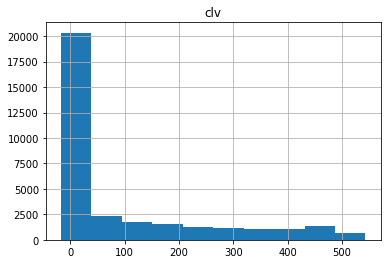

In [305]:
final_table_withclv.hist(column='clv')

In [306]:
final_table_withclv.clv.describe()

count    32641.000000
mean       100.621591
std        145.873308
min        -17.198332
25%         13.017082
50%         15.301624
75%        153.134157
max        543.351512
Name: clv, dtype: float64

In [307]:
final_table_withclv[final_table_withclv['clv']<0].shape

(3199, 30)

In [308]:
final_table_withclv['actual_churn_result'].value_counts()

1    18725
0    13916
Name: actual_churn_result, dtype: int64

In [292]:
a = ['package_type', 'preferred_genre', 'intended_use','weekly_consumption_hour', 'age', 'male_TF', 'op_sys', 'payment_type','attribution_calc', 'number', 'sum_cust_service_mssgs','sum_num_videos_completed', 'sum_vid_more_30', 'avg_app_opens','avg_cust_service_mssgs', 'avg_num_videos_completed', 'avg_vid_more_30','avg_series_started']

In [293]:
featimp = pd.DataFrame(a,columns=['features_used'])

In [294]:
featimp

,features_used
0,package_type
1,preferred_genre
2,intended_use
3,weekly_consumption_hour
4,age
5,male_TF
6,op_sys
7,payment_type
8,attribution_calc
9,number


In [295]:
b = [ 1.15794103,  1.37477094,  2.79604379, 27.96525905,  7.26360823,1.25938928,  2.10811148,  1.9827975 ,  2.30884875, 11.33741931,9.25362194,  2.3886531 , 11.04706171,  3.63975918,  4.47700531,3.18214397,  4.76963204,  1.68793341]

In [296]:
featimp['feat_importance'] = b

In [297]:
featimp

,features_used,feat_importance
0,package_type,1.157941
1,preferred_genre,1.374771
2,intended_use,2.796044
3,weekly_consumption_hour,27.965259
4,age,7.263608
5,male_TF,1.259389
6,op_sys,2.108111
7,payment_type,1.982797
8,attribution_calc,2.308849
9,number,11.337419


In [310]:
final_table_withclv[(final_table_withclv['clv']>0)&(final_table_withclv['clv']<25)].shape

(16142, 30)

In [344]:
subs.male_TF.value_counts()

False    200902
True      26457
Name: male_TF, dtype: int64

In [345]:
subs.shape

(227628, 30)

In [346]:
subs.preferred_genre.value_counts()

comedy           125129
drama             46872
regional           8990
international      6404
other              3907
Name: preferred_genre, dtype: int64